**Predict whether a car trip is interesting or not using Machine Learning**
===========================================================================
In this notebook, we are going through a machine leaning project with the goal of predicting whether a car trip is **interesting** or **not interesting**. This is a data science work sample at Root Insurance company.
## **Problem definition**
> Bulding a machine learning/statistical model to predict whether a new car trip is interesting or not interesting, given its characteristics and a sample of previous car trips in which the labels are known.

## **Data**
The data includes:
* A training dataset consisting of:
    - A dataset of $N_{train}$ "trip" csv data files: timeseries data recorded from car trips including the vehicle speed and heading degrees at different points in time.
    - A data matrix $X\in \mathbb{R}^{N_{train}\times K}$  of features about each trip.
    - A target vector $y\in \mathbb{R}^{N_{train}\times 1}$ indicating whether each trip is "interesting" (label 1) or not interesting(label 0).
* A test dataset (similar to the training dataset, but with $N_{test}$ records) consisting of just the trip data and the features, but no labels. 

## **Evaluation**
For general purposes, the evaluation metrics for this project are  the **$\mathbf{F_1}$ score**. The reason for these choices will be clear in the evalutation section below. However, you may be also interested in **precision** or **recall** depending on your business goalds. For more information about these metrics please refer to https://en.wikipedia.org/wiki/Confusion_matrix.

## **Features**
* trip_data_train.zip: a zipped folder containing the relevant csv trip data, where each trip has a series of records containing:
 - time seconds: the time in seconds since the start of the trip (float)
 - speed meters per second: the speed in $m/s$ of the vehicle (float $\in [0; \infty)$, invalid values will be indicated with NaN)
 - heading degrees: the angle in deg of the vehicle’s travel relative to north (clockwise positive, float $\in [0; 360)$, invalid values will be indicated with NaN)

* model_data_train.csv: a csv file containing
    - a column **filename** to join to the file names in trip_data_train.zip
    - the data matrix $X$ as columns **feature1**, ..., **feature14**.
    - the vector $y$ as column $Y$
    
* trip_data_test.zip and model_data_test.csv: similar trip data but without the label column y.  

## **THE BIG PICTURE**
First, this is a supervised learning problem because we are given labeled training examples. Moreover, this is a binary classification problem because the values of the target variable are just 1 ('interesting') or 0 ('not interesting'). Finally, there is no continuous flow of data coming in the system, there is no particular need to adjust to changing data rapidly, and the data is small enough to fit in memory, so plain batch learning should do just fine.

## **Importing some libraries**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

/home/han/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Exploratoring the <code>model_data_training.csv</code> data** 
First, we load the data and check its general information such as null values and data type of each column.

In [2]:
# read the data set using pandas
df_train = pd.read_csv('model_data_train.csv')
df_train.head(10)

,filename,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,y
0,0000.csv,False,False,True,5.209096,9789.261511,30753.872048,0.001010,5,13,1,9.373984e+03,0.317920,9.379193e+03,4.974085,0
1,0001.csv,False,False,False,4.450941,10552.521899,33151.725274,0.001000,3,11,1,4.251619e+04,2.229321,4.252064e+04,3.151531,0
2,0002.csv,False,False,True,5.396552,10233.433119,32149.278307,0.001015,6,13,1,1.305321e+07,34.259512,1.305322e+07,6.236594,0
3,0003.csv,False,False,True,4.970163,10829.056746,34020.485118,0.000993,4,8,1,1.131908e+03,25.768714,1.136878e+03,3.968008,1
4,0004.csv,False,False,False,5.266868,10678.703687,33548.137053,0.001009,6,11,1,3.163256e+03,145.154357,3.168523e+03,5.999782,0
5,0005.csv,False,False,False,5.423508,8884.564535,27911.682675,0.000985,4,9,1,6.801067e+05,0.005726,6.801121e+05,3.974651,1
6,0006.csv,False,False,True,4.261212,9896.063559,31089.400576,0.000994,6,11,1,6.486637e+03,0.000591,6.490899e+03,6.154283,1
7,0007.csv,False,False,True,5.807669,9706.998432,30495.434961,0.001004,2,8,1,3.261819e+04,130.883996,3.262400e+04,2.071923,0
8,0008.csv,False,False,True,4.778476,10459.224594,32858.623148,0.000988,7,15,1,8.394154e+02,0.872917,8.441939e+02,6.908172,0
9,0009.csv,False,False,True,4.306586,11439.243623,35937.443729,0.001005,6,12,1,1.681729e+06,0.000263,1.681733e+06,6.063219,0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   filename   1000 non-null   object 
 1   feature1   1000 non-null   bool   
 2   feature2   1000 non-null   bool   
 3   feature3   1000 non-null   bool   
 4   feature4   1000 non-null   float64
 5   feature5   1000 non-null   float64
 6   feature6   1000 non-null   float64
 7   feature7   1000 non-null   float64
 8   feature8   1000 non-null   int64  
 9   feature9   1000 non-null   int64  
 10  feature10  1000 non-null   int64  
 11  feature11  1000 non-null   float64
 12  feature12  1000 non-null   float64
 13  feature13  1000 non-null   float64
 14  feature14  1000 non-null   float64
 15  y          1000 non-null   int64  
dtypes: bool(3), float64(8), int64(4), object(1)
memory usage: 104.6+ KB


Our data has 1000 data points which is quite small. We see that our data has no missing/unknown values. In adition, there are 3 main data types among all columns: *object, boolean and numeric*. The column **filename** is the only column that has object data type. **feature1, feature2, feature3** are columns that have bool data type. **feature8, feature9, feature10** have discete numeric data type which is integer. The other columns that have numeric data type contain only floating-point numbers. 

### **Exploring the target's distribution**
Before taking any further steps, let's take a look at the distribution of column **y** to see if our data is balance or not. It is going to be important when we choose the evaluation metrics.

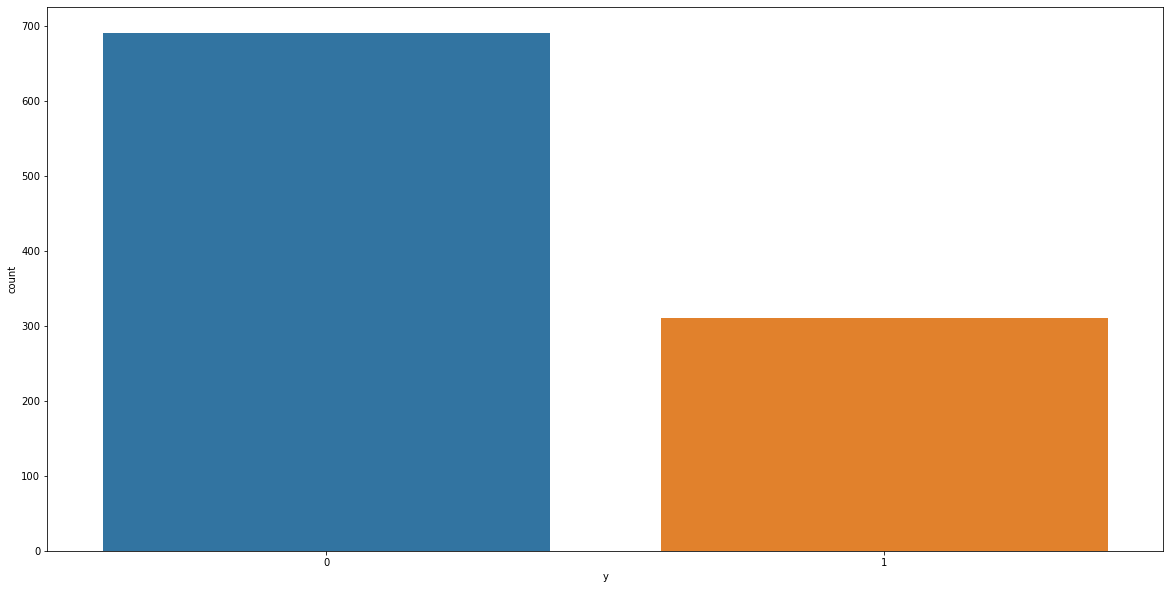

In [4]:
#use seaborn countplot to count unique values in the target
plt.figure(figsize=(20,10))
sns.countplot(x = 'y', data = df_train)
plt.show()

We see that this training data set is quite imbalance. The number of data with label 0 is approximately twice the number of data with label 1. Thus, if we choose a "dumb" classifier which only predicts 0, then the accuracy of this classifier is  approximatelly $67\%$. Thus, it is not a good idea to use **accuracy score** as an evalution metric in this problem. We should choose other evaluation metrics such as **confusion matrix, $F_1$ score, precision and recall, ROC, AUC**. We will go back to the evaluation in latter sections.
### **Exploring the data's features**
Since our data contains both boolean and numeric data types, it is reasonable divide the data's features into two group: categorical features and numerical features. Since **feature1, feature2, feature3** have bool data type, they are automatically categorical features. Let's study them first by plotting their count plots

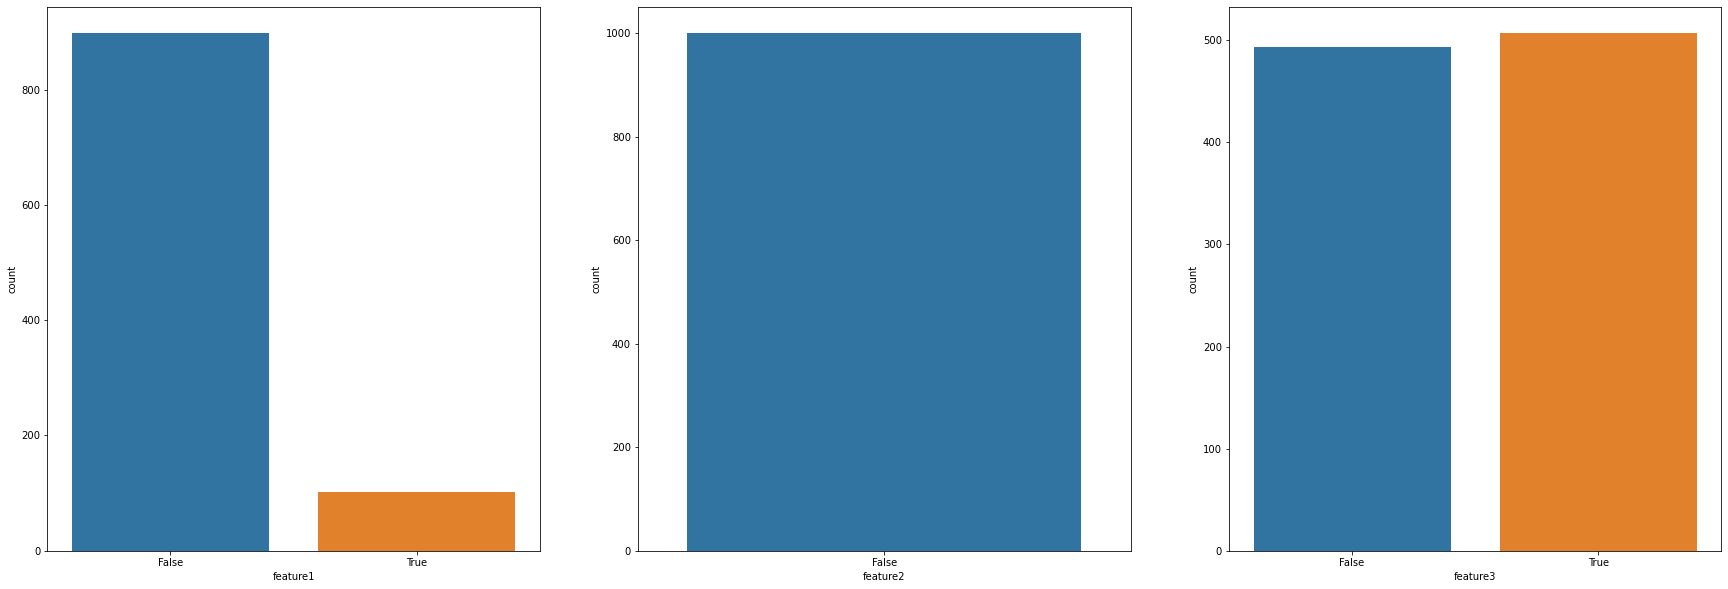

In [5]:
df_train_bool = df_train[['feature1', 'feature2', 'feature3']]
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (30,10))
for k in range(3):
    sns.countplot(x = df_train_bool.columns[k], data = df_train_bool, ax = ax[k])

* First, all values in **feature2** are False. Let's assume that our data was sampled from some unknown distribution $P$. If the sampling process was unbiased, then the fact that **feature2** are all False means that the distribution $P$ concentrates on the hyper-plane **feature2** = False. Thus, the next time if we sample other data points using $P$, we also expect that most of those data points have **feature2** = False. Therefore, we can drop **feature2** since it does not contribute much information for predicting **y**. For example, decision tree clasifiers can not use **features2** to split the data when building a tree.
* Second, **feature3** are quite balance so we do not need to take any action.
* Finally, **feature1** is quite imbalance. Let's calculate the percentage of False and True in this feature 

In [6]:
n_False = len(df_train[df_train['feature1']==0])
n_True = len(df_train[df_train['feature1']==1])
print('The percertange of False  in  feature1 is {:3.2f}%'.format(n_False/(n_False + n_True)*100))
print('The percertange of True  in  feature1 is {:3.2f}%'.format(n_True/(n_False + n_True)*100))

The percertange of False  in  feature1 is 89.80%
The percertange of True  in  feature1 is 10.20%


Since False accounts for almost 90% of the values in **feature1**, we may drop it from the data or we may keep it. Before making a decision, let's compute the correlation between **feature1** and the target **y**.

In [7]:
print('The correlation between feature1 and target y is {:3.2f}'.format(df_train['feature1'].corr(df_train['y'])))

The correlation between feature1 and target y is -0.20


Next, let's plot the count plots of the target based on the values of **feature1**

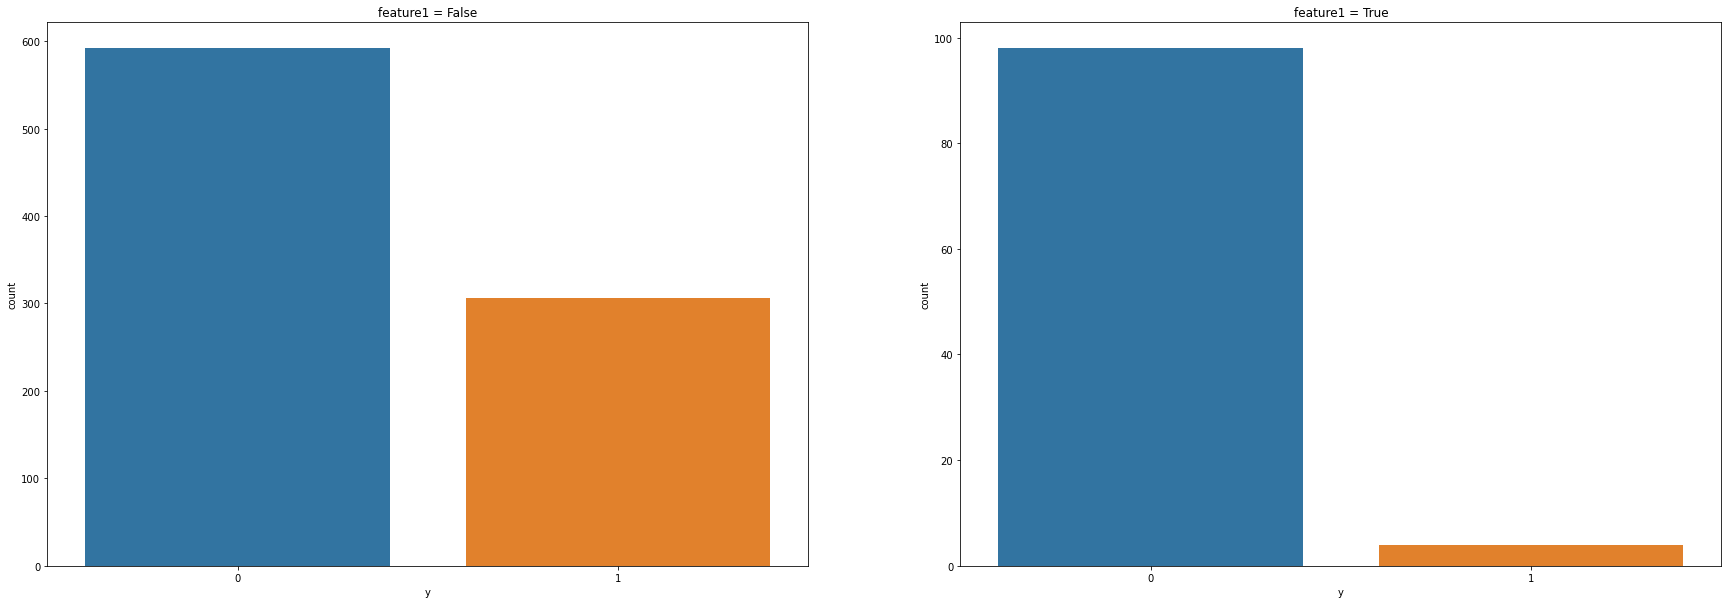

In [8]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (30,10))
sns.countplot(df_train[df_train['feature1'] == 0]['y'], ax = ax[0]).set_title('feature1 = False')
sns.countplot(df_train[df_train['feature1'] == 1]['y'], ax = ax[1]).set_title('feature1 = True')
plt.show()

The correlation coefficient between **feature1** and **y**  is neigative and not that very small. In addition, we notice that most data with **feature1** = True belong to class 0 which goes along well with the neigativity of the correlation coefficient. Thus **feature1** may provides some useful information for predicting **y**. Therefore, we will keep it.

Now, let's look at **feature8, feature9, feature10** more closely. We are going to count the unique values in these features

In [9]:
columns = ['feature8', 'feature9', 'feature10']
for col in columns:
    x = pd.unique(df_train[col])
    print('{0} has {1} unique values which are: {2}'.format(col, len(x), np.sort(x)))

feature8 has 10 unique values which are: [ 1  2  3  4  5  6  7  8  9 10]
feature9 has 20 unique values which are: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22]
feature10 has 1 unique values which are: [1]


Similar to **feature2**, **feature10** only has one value so we will drop it from the data for the same reason that we drop **feature2**. For the other two features, it is hard to say whether they are categorical features by just looking at their values so let's plot their histograms.

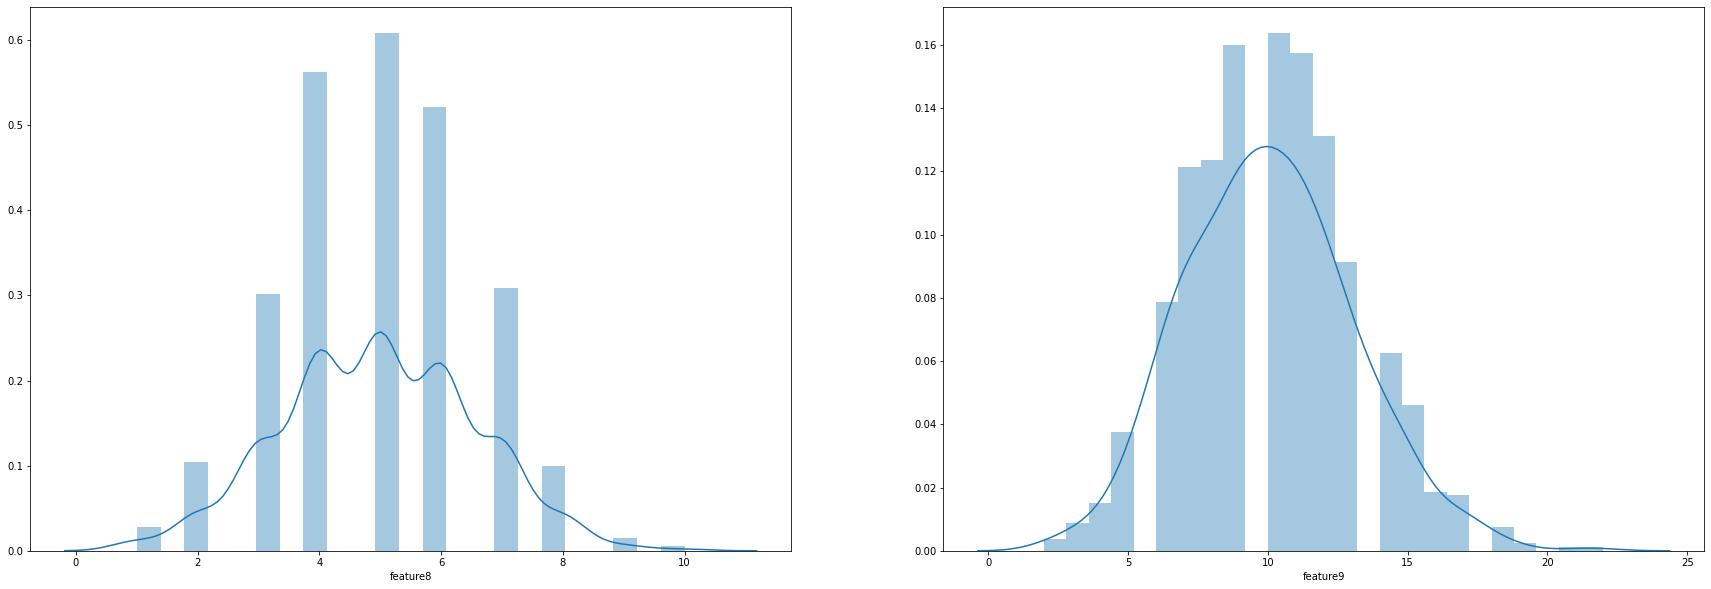

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (30,10))
sns.distplot(df_train['feature8'], ax = ax[0])
sns.distplot(df_train['feature9'], ax = ax[1])
plt.show()

Based on the plot, we can see that their empirical density are similar to density of binomial distributions. Thus, we can conclude that they are features with counting values. Therefore, we will consider them as numeric features. For completeness, let's also plot their box plot.

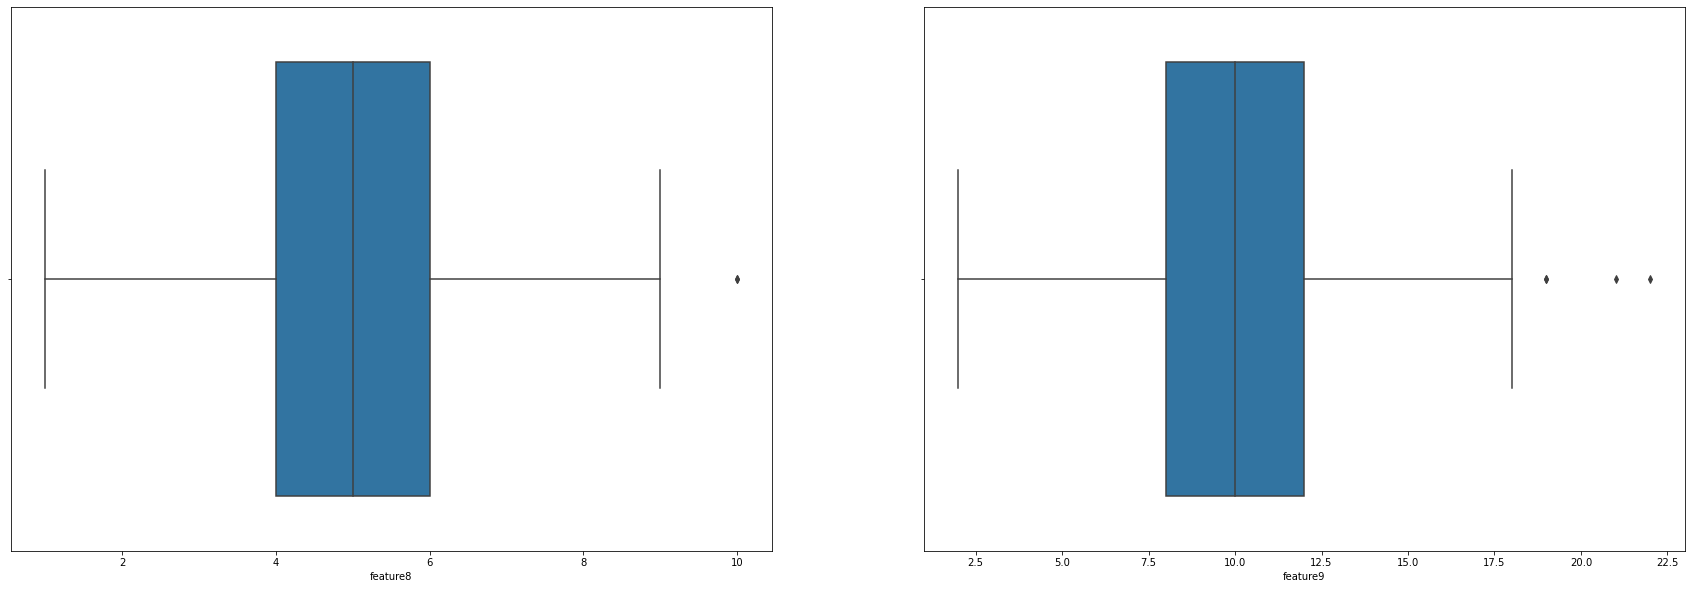

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (30,10))
sns.boxplot(df_train['feature8'], ax = ax[0])
sns.boxplot(df_train['feature9'], ax = ax[1])
plt.show()

Overall, **feature8** and **feature9** are nice features because they  do not have many outliers.

Finally, let's explore the other numeric features. We plot their histograms and box plots.

In [12]:
df_train_num = df_train.drop(['filename','feature1', 'feature2', 'feature3', 'feature8','feature9', 'feature10', 'y'], axis = 1)
df_train_num

,feature4,feature5,feature6,feature7,feature11,feature12,feature13,feature14
0,5.209096,9789.261511,30753.872048,0.001010,9.373984e+03,0.317920,9.379193e+03,4.974085
1,4.450941,10552.521899,33151.725274,0.001000,4.251619e+04,2.229321,4.252064e+04,3.151531
2,5.396552,10233.433119,32149.278307,0.001015,1.305321e+07,34.259512,1.305322e+07,6.236594
3,4.970163,10829.056746,34020.485118,0.000993,1.131908e+03,25.768714,1.136878e+03,3.968008
4,5.266868,10678.703687,33548.137053,0.001009,3.163256e+03,145.154357,3.168523e+03,5.999782
...,...,...,...,...,...,...,...,...
995,5.557740,11792.408911,37046.945203,0.000994,7.875141e+06,2.234526,7.875147e+06,5.978734
996,6.159746,10144.628262,31870.289621,0.001002,8.001451e+06,7.197367,8.001457e+06,5.108532
997,5.903515,11274.898280,35421.137606,0.001014,5.142378e+09,96.801744,5.142378e+09,6.002729
998,4.196761,8774.186650,27564.920320,0.000996,2.952686e+04,1439.063599,2.953106e+04,5.043609


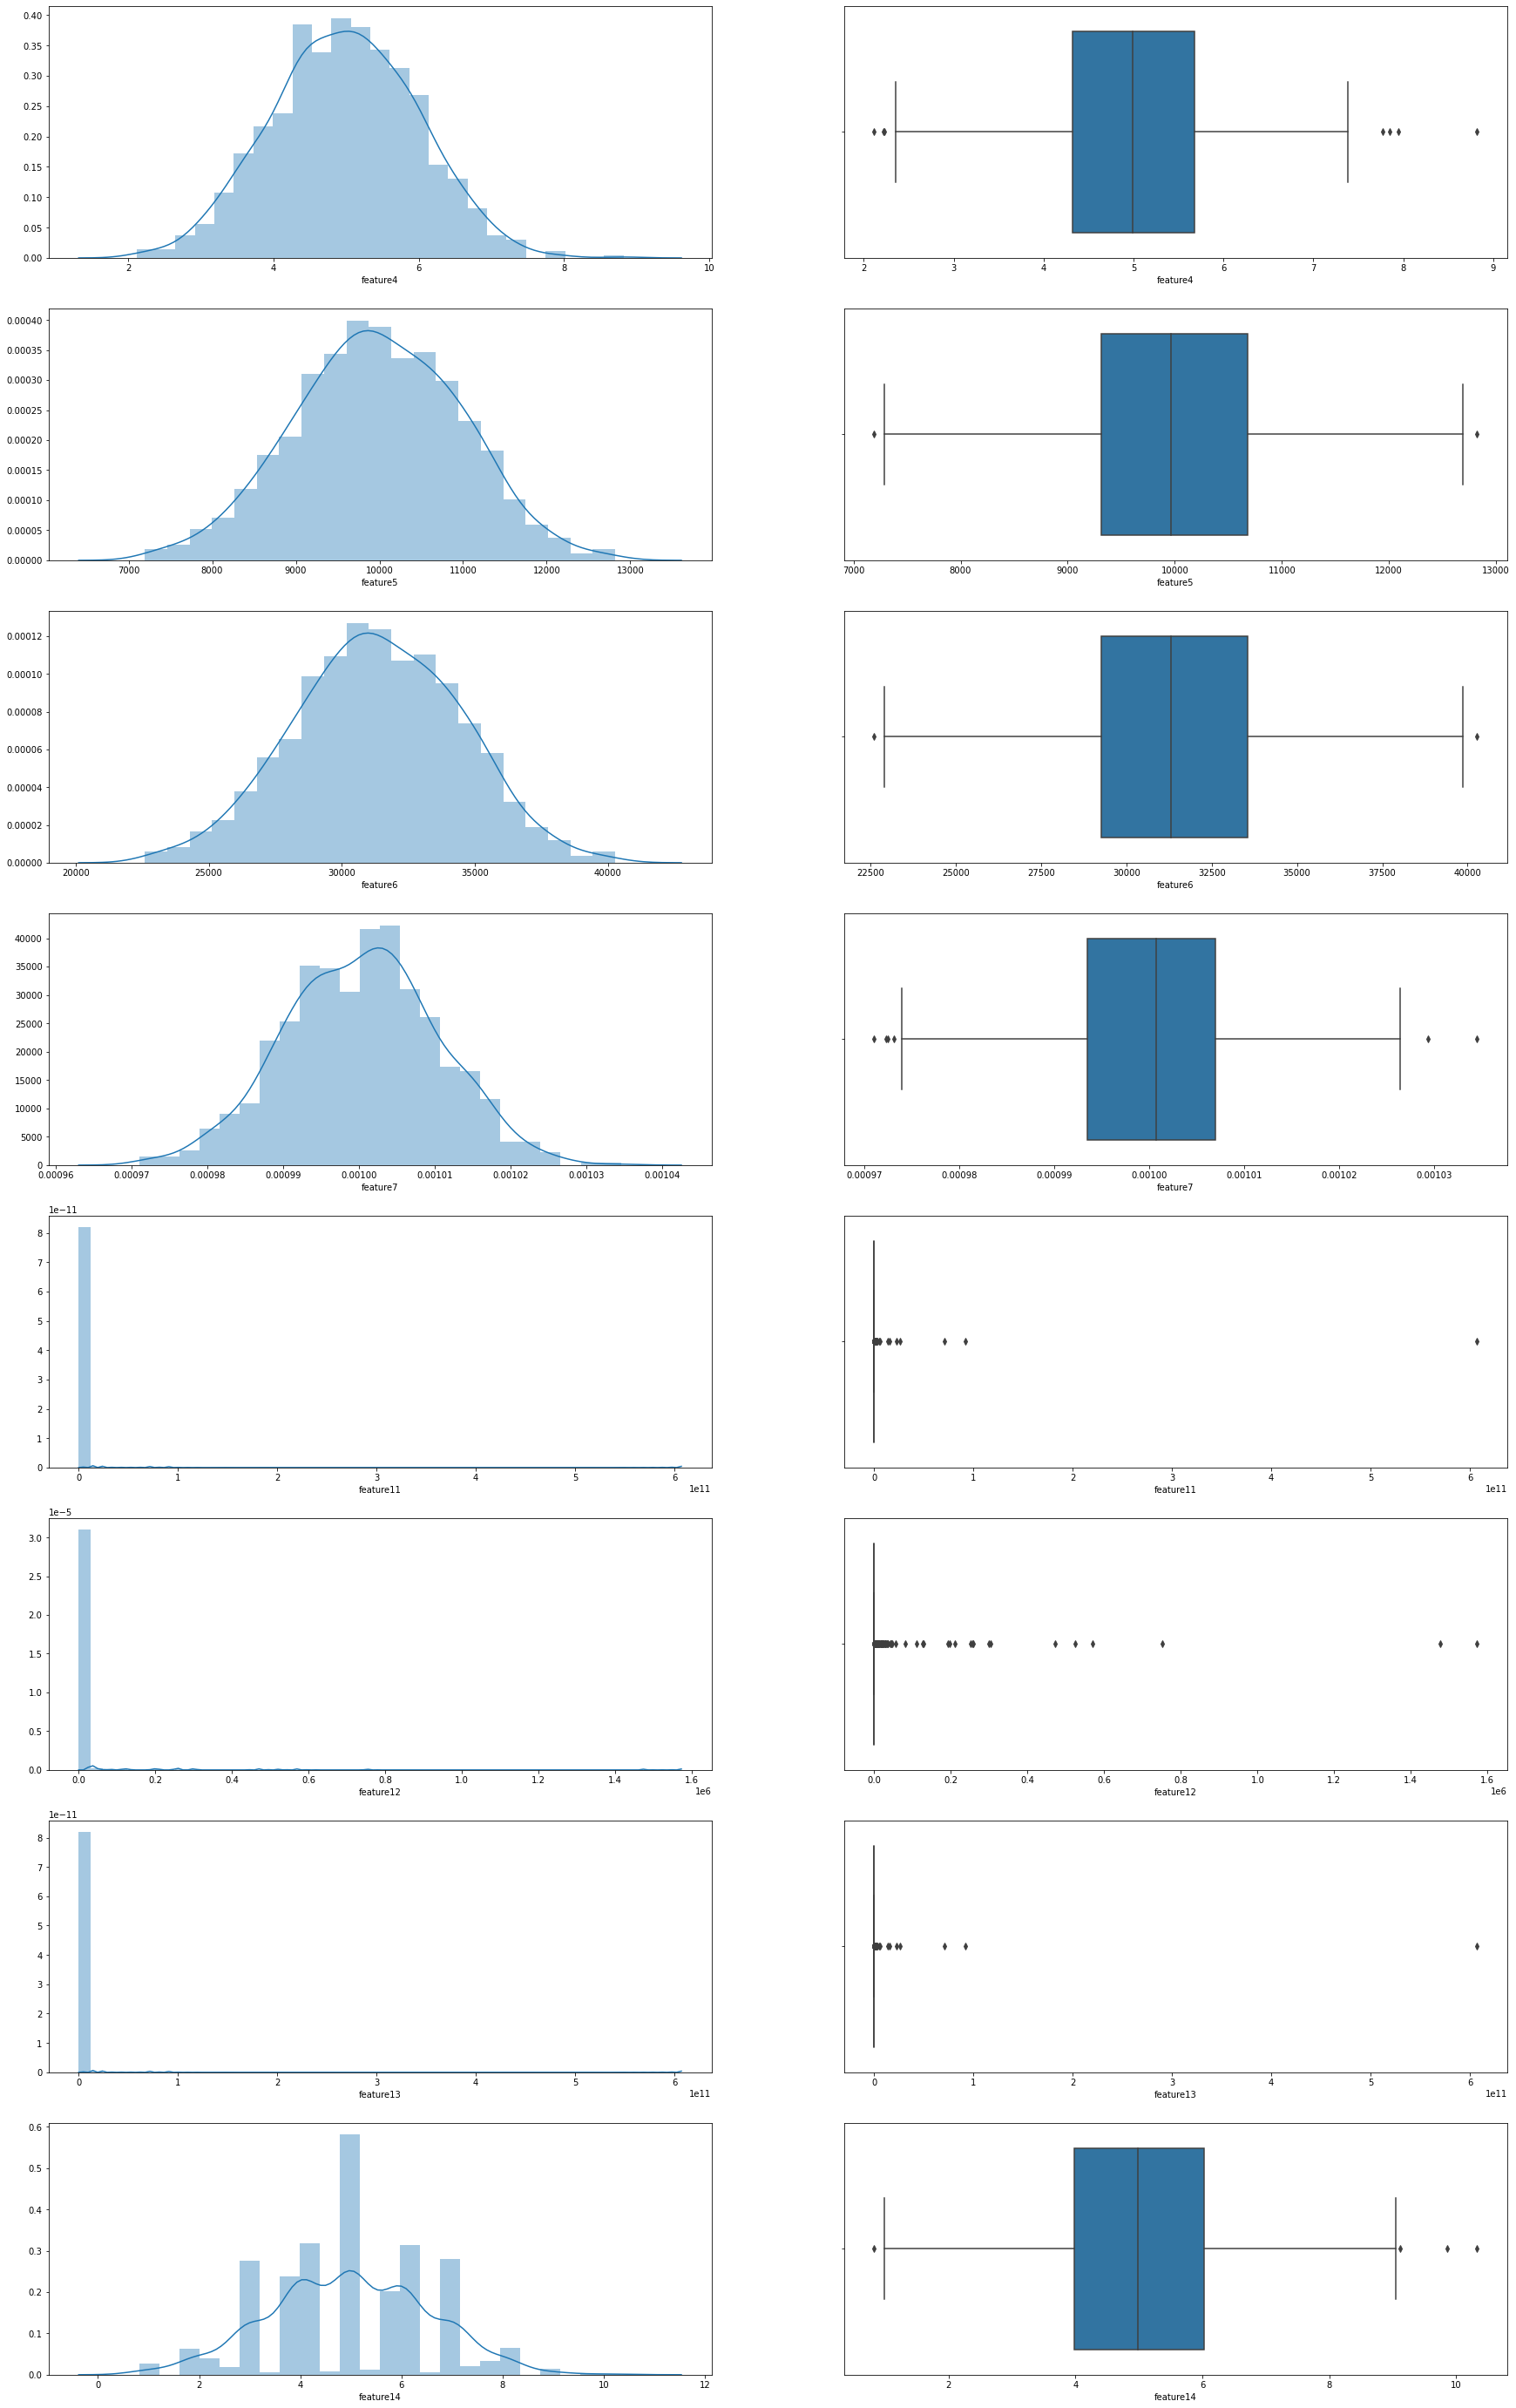

In [13]:
fig, ax = plt.subplots(nrows = 8, ncols = 2, figsize = (30,50))
ax = ax.ravel()
for i in range(8):
    sns.distplot(df_train_num[df_train_num.columns[i]], ax = ax[2*i])
    sns.boxplot(df_train_num[df_train_num.columns[i]], ax = ax[2*i+1])

Overall, **feature4, feature5, feature6, feature7, feature14** are quite nice  because their densities are approximatelly densities of normal distributions. They also do not have many outliers. On the other hand, **feature11, feature12, feature13** are very skew so it it better to apply **log transform** to them before using them to train models. Let's look at the distribution of those features after we apply the log transform. 

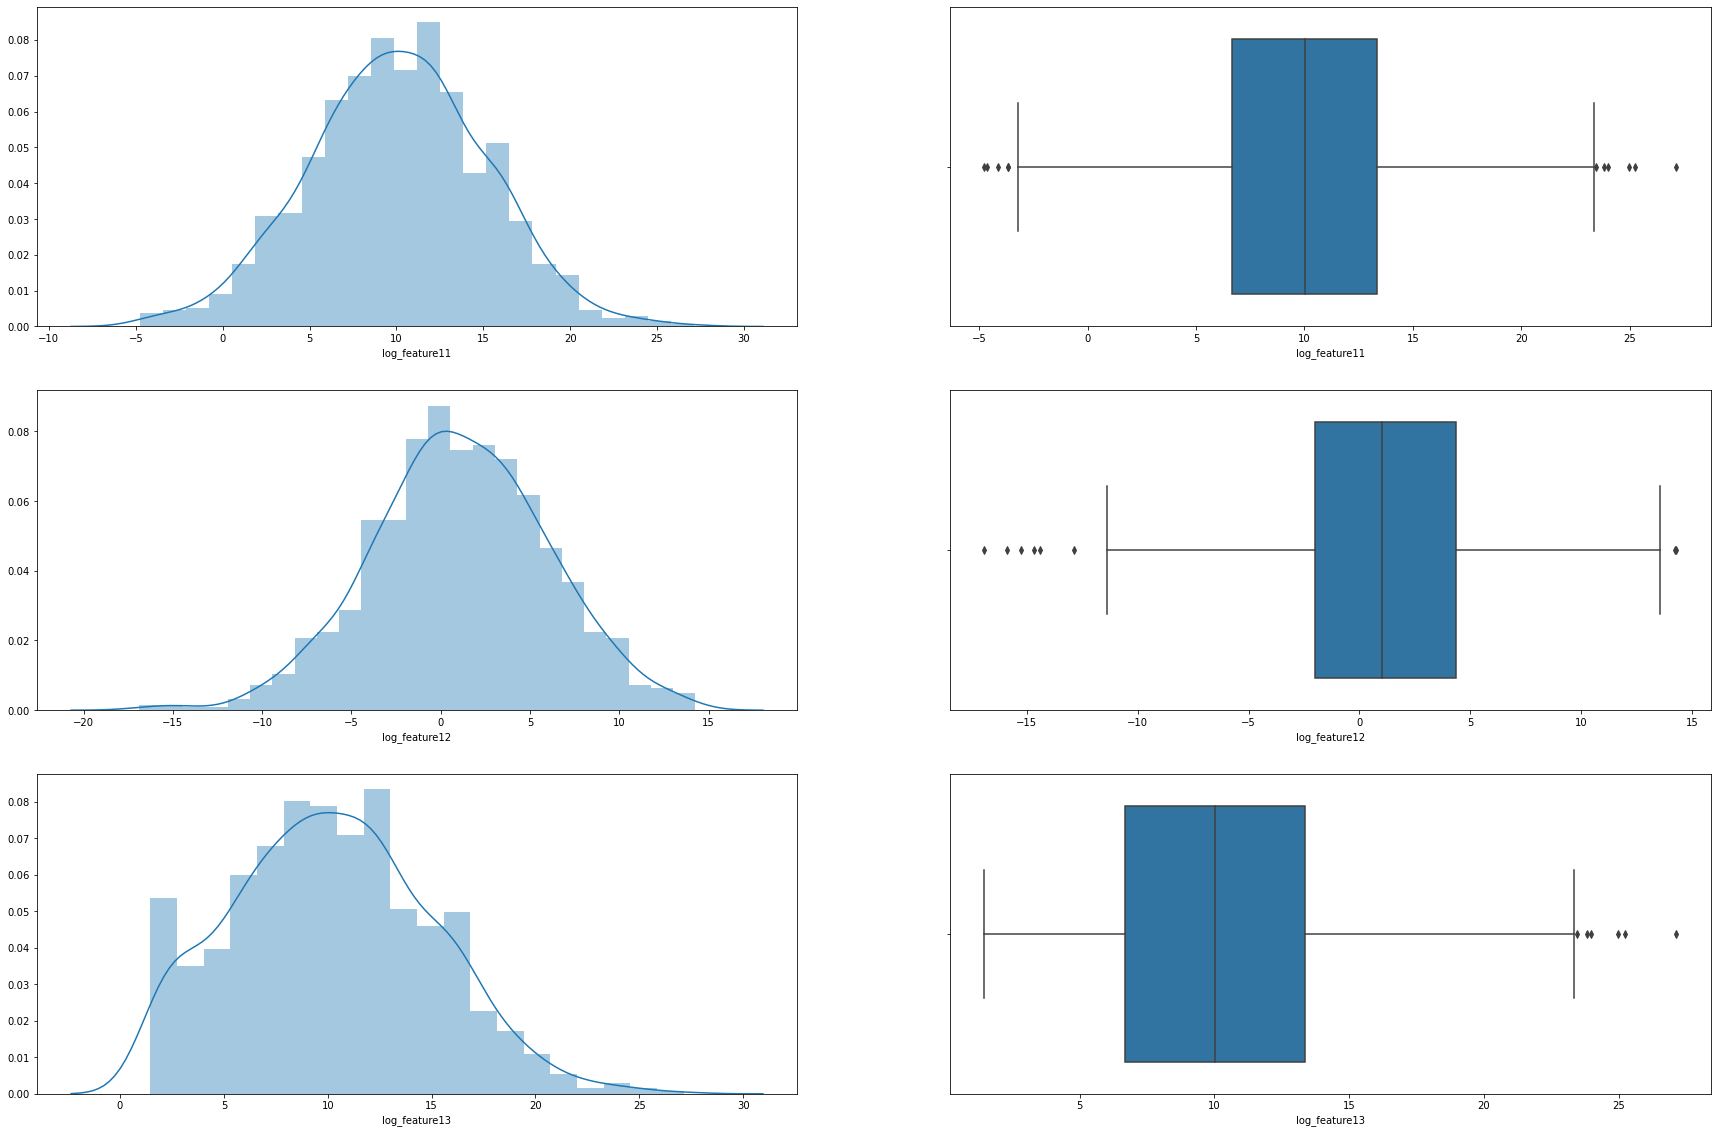

In [14]:
data = df_train[['feature11', 'feature12', 'feature13']]
data_log = np.log(data)
data_log = data_log.values
data_log = pd.DataFrame(data_log, columns = ['log_feature11', 'log_feature12', 'log_feature13'])
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (30,20))
ax = ax.ravel()
for i in range(3):
    sns.distplot(data_log[data_log.columns[i]], ax = ax[2*i])
    sns.boxplot(data_log[data_log.columns[i]], ax = ax[2*i+1])

We see that the distributions of these features look better after the transformation.

> **Conclusion 1:** from the above insights that we get when exploring the  <code>model_data_training.csv</code> data, we have the following remarks:
> * Fisrt, we will drop **feature2** and **feature10** from the data.
> * Second, we will apply *log transform* to **feature11, feature12, feature13**.
> * Third, we should not trust *accuracy score* as the evaluation metric.

## **Exploring the data in the <code>trip_data_train</code> folder**
The folder <code>trip_data</code> in   <code>trip_data_train</code> contains 1000 .csv files. Each of the is a car trip corresponding to a row in the <code>model_data_train.csv</code>. Let's take a look at the <code>0001.csv</code> to understand the information in these .csv file.

In [15]:
trip_example = pd.read_csv('trip_data_train/trip_data/0001.csv')
trip_example

,time_seconds,speed_meters_per_second,heading_degrees
0,0.000,9.170000,NaN
1,0.994,9.311178,NaN
2,1.711,11.184463,NaN
3,2.711,11.820962,89.572280
4,3.711,12.141592,89.334795
...,...,...,...
626,623.463,2.389231,354.789760
627,623.711,2.058260,356.250950
628,624.711,1.883894,NaN
629,625.711,1.628717,NaN


In [16]:
trip_example.isna().sum()

time_seconds               0
speed_meters_per_second    0
heading_degrees            6
dtype: int64

There are three features in the data: **time_seconds, speed_meters_per_second, heading_degrees**. There are also missing values in the column **heading_degrees**. First, let's study the distribution of elapsed times over all <code>.csv</code> files.

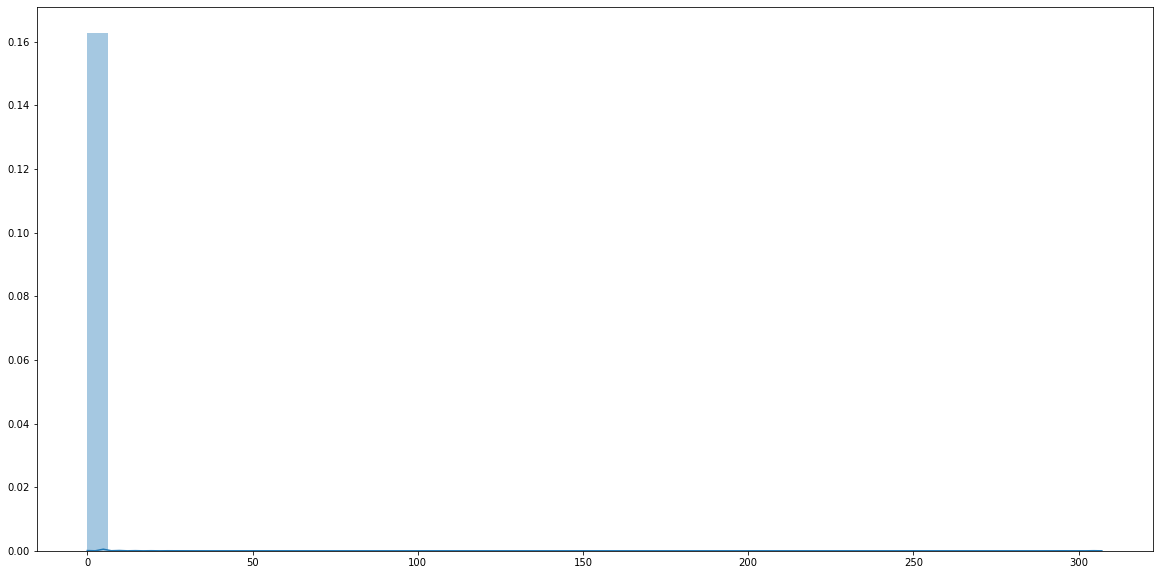

The mean elapsed times is: 1.0111090327992076
The standard deviation of elapsed times is: 1.646324380280439
The minimum elapsed times is: 0.00010514299998476417
The maximum elapsed times is: 307.0
The percentage of elapsed times that is larger than 3 seconds is: 0.23%
The percentage of elapsed times that is larger than 5 seconds is: 0.15%
The percentage of elapsed times that is larger than 10 seconds is: 0.04%


In [17]:
elapsed_times = []
path = 'trip_data_train/trip_data'
for file in os.listdir(path):
    p = os.path.join(path, file)
    if file[-3:] == 'csv':
        trip = pd.read_csv(p)
        times = trip['time_seconds'].values
        for i in range(1, len(times)):
            elapsed_times.append(times[i]-times[i-1])
result1 = list(filter(lambda x: x >= 3, elapsed_times)) 
result2 = list(filter(lambda x: x >= 5, elapsed_times)) 
result3 = list(filter(lambda x: x >= 10, elapsed_times)) 
# plot the histogram of elapsed times
plt.figure(figsize = (20,10))
sns.distplot(elapsed_times)
plt.show()
print('The mean elapsed times is: {0}'.format(np.mean(elapsed_times)))
print('The standard deviation of elapsed times is: {0}'.format(np.std(elapsed_times)))
print('The minimum elapsed times is: {0}'.format(min(elapsed_times)))
print('The maximum elapsed times is: {0}'.format(max(elapsed_times)))
print('The percentage of elapsed times that is larger than 3 seconds is: {:3.2f}%'.format(len(result1)/len(elapsed_times)*100))
print('The percentage of elapsed times that is larger than 5 seconds is: {:3.2f}%'.format(len(result2)/len(elapsed_times)*100))
print('The percentage of elapsed times that is larger than 10 seconds is: {:3.2f}%'.format(len(result3)/len(elapsed_times)*100))

In general, the information about the trip was recored after 1 second on average. There is a very small amount of elapsed times that is larger than 10 seconds.

Now, let's plot <code>speed_meters_per_second</code> and <code>deading_degrees</code> with respect to time.

In [18]:
# reset the index using time_seconds column
trip_example_copy = trip_example.set_index('time_seconds')
trip_example_copy

,speed_meters_per_second,heading_degrees
time_seconds,,
0.000,9.170000,NaN
0.994,9.311178,NaN
1.711,11.184463,NaN
2.711,11.820962,89.572280
3.711,12.141592,89.334795
...,...,...
623.463,2.389231,354.789760
623.711,2.058260,356.250950
624.711,1.883894,NaN


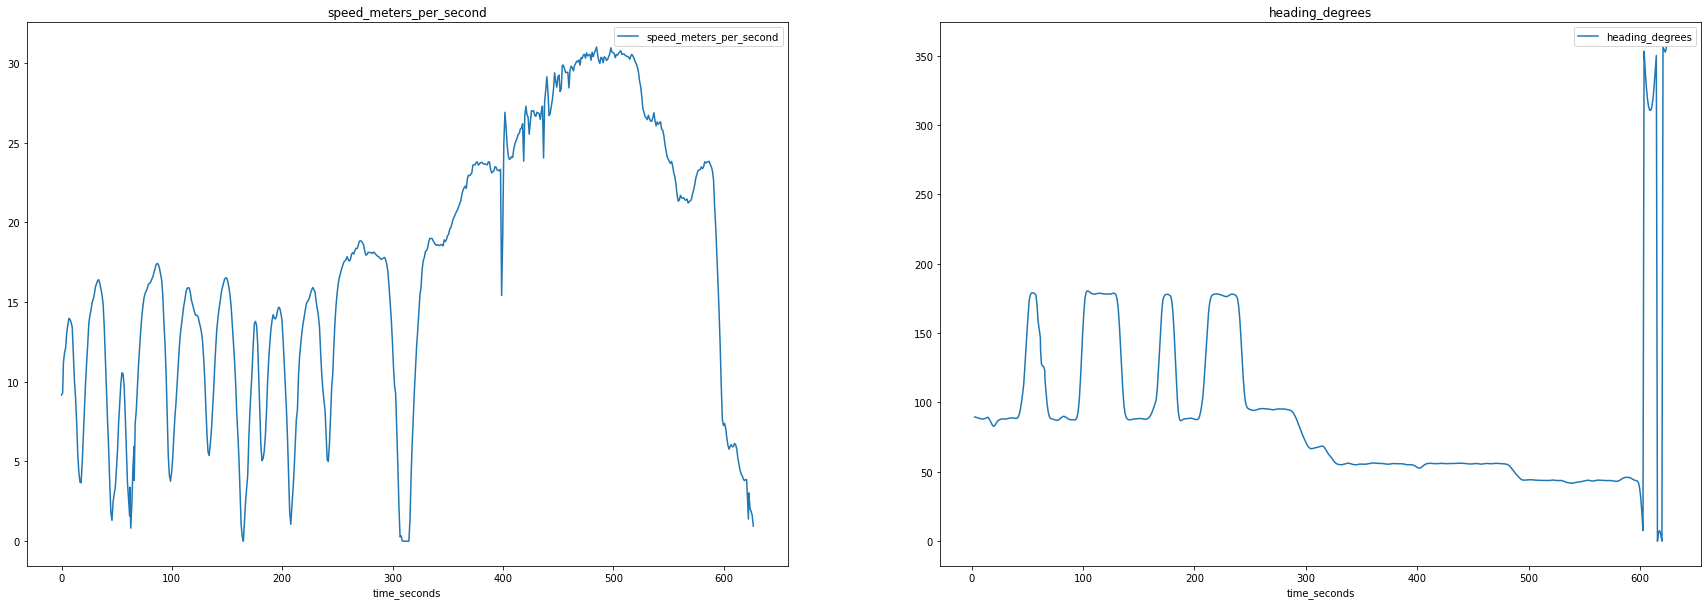

In [19]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (30,10))
trip_example_copy.plot(y = 'speed_meters_per_second', ax = ax[0]).set_title('speed_meters_per_second')
trip_example_copy.plot(y = 'heading_degrees', ax = ax[1]).set_title('heading_degrees')
plt.show()

We see the behavior of the speed and the heading degree are quite irregular due to the complexity of the road. We will study these features more carefully when we perform feature extraction in the next section.

## **Feature extraction**
In the part, we are going to extract two more features from the .csv files in the trip_data_train folder. For each of the trip in the trip_data_train, we are going to write codes to count the number of stops and the number of turns.  
### **Counting the number of stops in each trip and save in an list**
In order to count the number of stops in a trip, we need to define what a stop is. Intuitelly, a stop is a period of time when the car is not moving. In other words, it is a period of time when the speed of the car is zero. Now, to get better insight about the change in the speed of a car, let's plot   the column **speed_meters_per_second** against the column **time_seconds** in the file <code>0001.csv</code>.

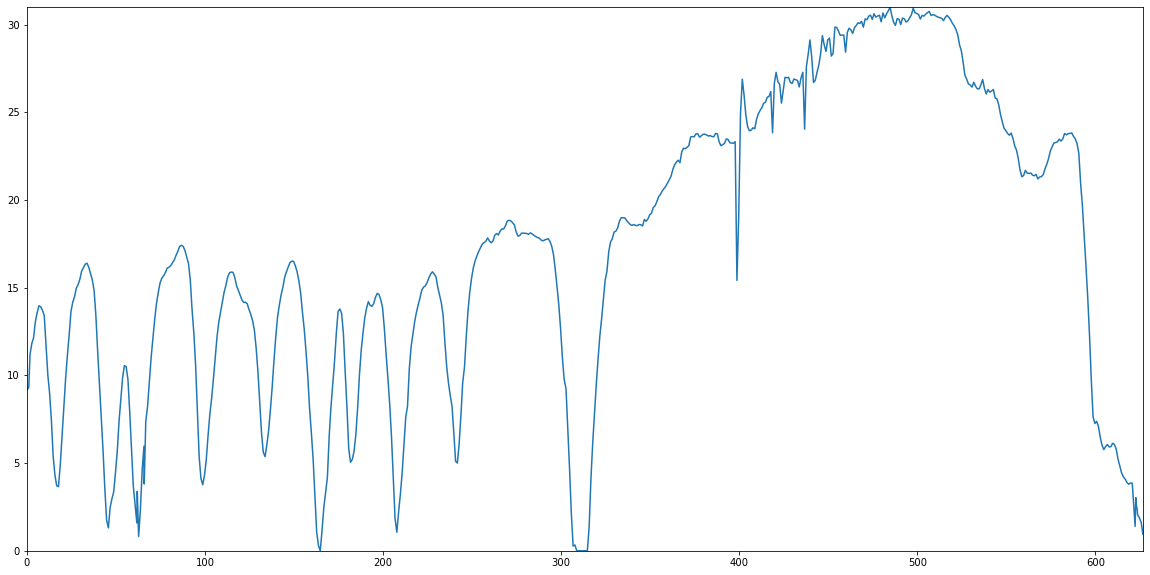

In [20]:
plt.figure(figsize = (20,10))
plt.margins(0.00001)
plt.plot(trip_example['time_seconds'], trip_example['speed_meters_per_second'])
plt.show()

Based on the picture, we can see that there are two events when the speed of the car was almost zero. One event is in the interval $[150s, 200s]$(event 1) and the other is in the interval $[300s, 350s]$ (event 2). Let's take a look at them closely both in picture and numbers

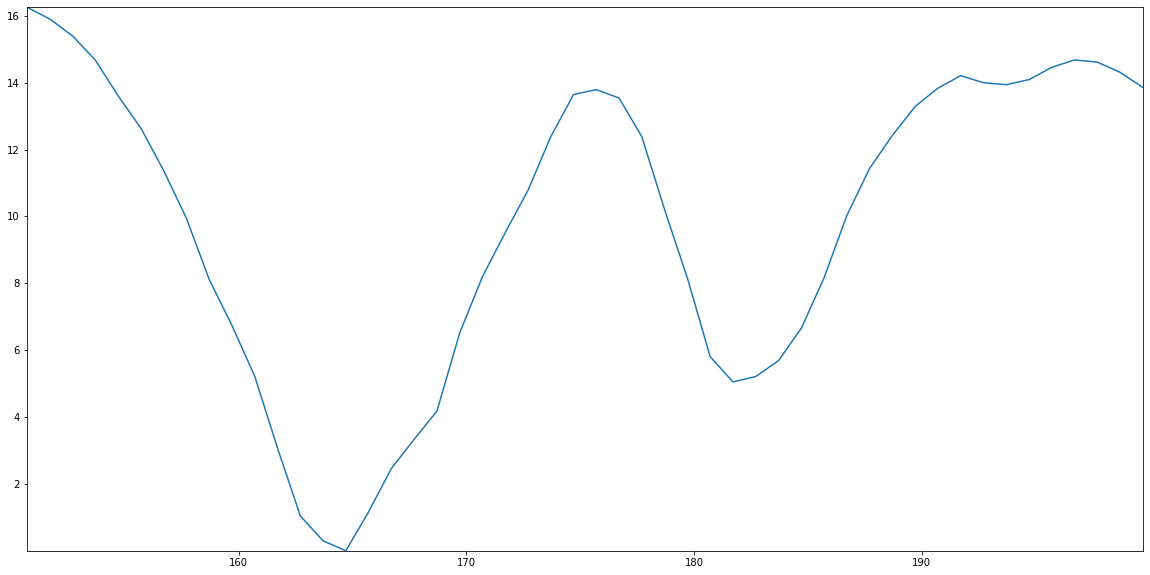

In [21]:
# event 1
plt.figure(figsize = (20,10))
y = trip_example[(trip_example['time_seconds'] > 150) & (trip_example['time_seconds'] < 200)]['speed_meters_per_second']
x = trip_example[(trip_example['time_seconds'] > 150) & (trip_example['time_seconds'] < 200)]['time_seconds']
plt.margins(0.0001)
plt.plot(x, y)
plt.show()

In [22]:
trip_example[(trip_example['time_seconds'] > 150) & (trip_example['time_seconds'] < 200) & (trip_example['speed_meters_per_second'] < 1.)]

,time_seconds,speed_meters_per_second,heading_degrees
165,163.711,0.297159,96.789263
166,164.711,0.001742,99.304320


We see that event 1 only happens at $164.711s$ with the speed $0.001742$. Since we only consider events that last longer than 3s , we can not consider this event as a stop.

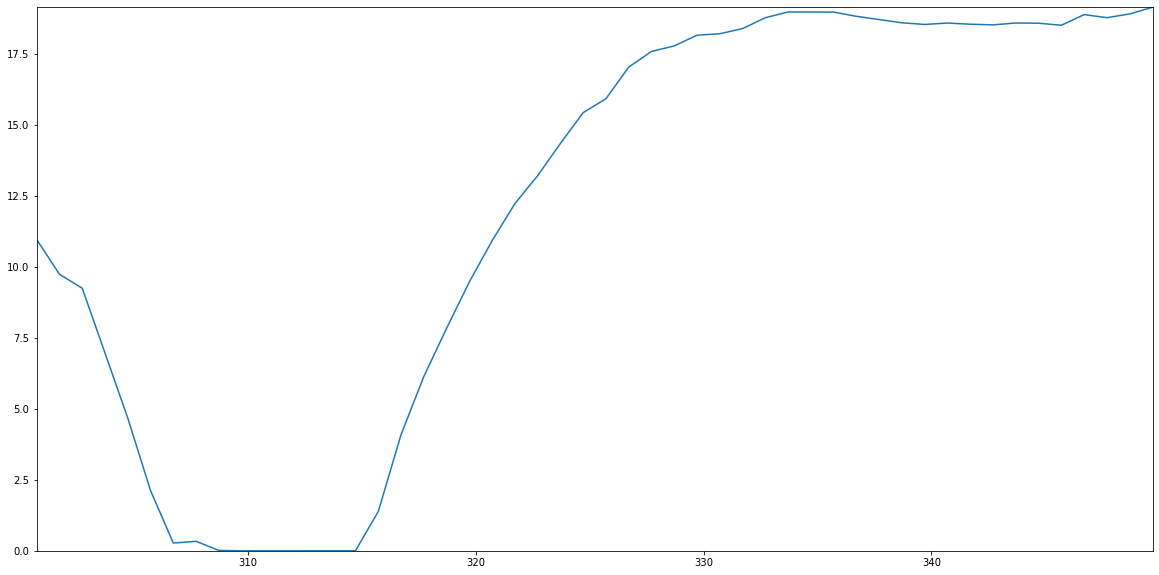

In [23]:
# event 2
plt.figure(figsize = (20,10))
y = trip_example[(trip_example['time_seconds'] > 300) & (trip_example['time_seconds'] < 350)]['speed_meters_per_second']
x = trip_example[(trip_example['time_seconds'] > 300) & (trip_example['time_seconds'] < 350)]['time_seconds']
plt.margins(0.0001)
plt.plot(x, y)
plt.show()

In [24]:
trip_example[(trip_example['time_seconds'] > 300) & (trip_example['time_seconds'] < 350) & (trip_example['speed_meters_per_second'] < 1.)]

,time_seconds,speed_meters_per_second,heading_degrees
308,306.711,0.271712,66.928277
309,307.711,0.333254,67.147890
310,308.711,0.011230,67.367503
311,309.711,0.000177,67.587117
312,310.711,0.000149,67.806730
313,311.711,0.000164,68.026343
314,312.711,0.000090,68.245957
315,313.711,0.000048,68.465570
316,314.711,0.000042,68.641261


Event 2 goes along with our intuition. Starting from 309.711s to 314.711s the speed of the car is alomst $0$. Since this event 2  lasts longer than 3 second, we consider this as a stop. Here is a piece of  codes that counts then number of stops in <code>0001.csv</code> following the intuition we just explained.  

In [25]:
#counting number of stops
epsilon = 0.001
count  = 0
results = []
times = []
i = 0
while i  < len(trip_example):
    if trip_example['speed_meters_per_second'].iloc[i] <= epsilon:
        temp = [trip_example['speed_meters_per_second'].iloc[i]]
        j = i+1
        time = 0
        while (j < len(trip_example)) and (trip_example['speed_meters_per_second'].iloc[j] <= epsilon):
            time += trip_example['time_seconds'].iloc[j]-trip_example['time_seconds'].iloc[j-1]
            temp.append(trip_example['speed_meters_per_second'].iloc[j])
            j += 1 
        if time >= 3:   
            count += 1 
            results.append(temp)  
            times.append(time)
        i = j
    else:
        i += 1
print(count)  
print(results)
print(times)

1
[[0.0001769029, 0.0001490851, 0.00016351028, 8.986075000000001e-05, 4.846326e-05, 4.1994797e-05]]
[5.0]


Now, we loop over all the .csv file in the <code>trip_data_train</code> folder to count the number of stops in each trip.

In [26]:
epsilon = 0.001
num_stops_train = {}
path = 'trip_data_train/trip_data'
for file in os.listdir(path):
    p = os.path.join(path, file)
    if file[-3:] == 'csv':
        trip = pd.read_csv(p)
        trip_index = int(file[0:4])
        count  = 0
        i = 0
        while i  < len(trip):
            if trip['speed_meters_per_second'].iloc[i] <= epsilon:
                j = i+1
                time = 0
                while (j < len(trip)) and (trip['speed_meters_per_second'].iloc[j] <= epsilon):
                    time += trip['time_seconds'].iloc[j]-trip['time_seconds'].iloc[j-1]
                    j += 1 
                if time >= 3: 
                    count += 1 
                i = j
            else:
                i += 1  
        num_stops_train[trip_index] = count   
#sort num_turns based on its keys
list_num_stops_train = list(dict(sorted(num_stops_train.items())).values())

Let's also find the number of stops for each trip in the <code>work_sample_test_trips</code>

In [27]:
epsilon = 0.001
num_stops_test = {}
path = 'work_sample_test_trips'
for file in os.listdir(path):
    p = os.path.join(path, file)
    if file[-3:] == 'csv':
        trip = pd.read_csv(p)
        trip_index = int(file[0:4])
        count  = 0
        i = 0
        while i  < len(trip):
            if trip['speed_meters_per_second'].iloc[i] <= epsilon:
                j = i+1
                time = 0
                while (j < len(trip)) and (trip['speed_meters_per_second'].iloc[j] <= epsilon):
                    time += trip['time_seconds'].iloc[j]-trip['time_seconds'].iloc[j-1]
                    j += 1 
                if time >= 3: 
                    count += 1 
                i = j
            else:
                i += 1  
        num_stops_test[trip_index] = count   
#sort num_turns based on its keys
list_num_stops_test = list(dict(sorted(num_stops_test.items())).values())

**Time complexity:** Assume that each .csv file has **n** rows, then the above code takes **O(n)** times to count the number of stops in one <code>.csv</code> file. Thus, if a folder has **m** <code>.csv</code> files, then the code above takes **O(mn)** times to count the number of stops in all <code>.csv</code> files.

**Space complexity:** We only need **O(m)** space to store the results which is unavoidable.

### **Counting the number of turns**
Before we go into a mathematical definition of a turn in this problem, let's think about how we actually make a turn when we drive a car. Let's imagine that we are driving from point A to point B as shown in the following two pictures:

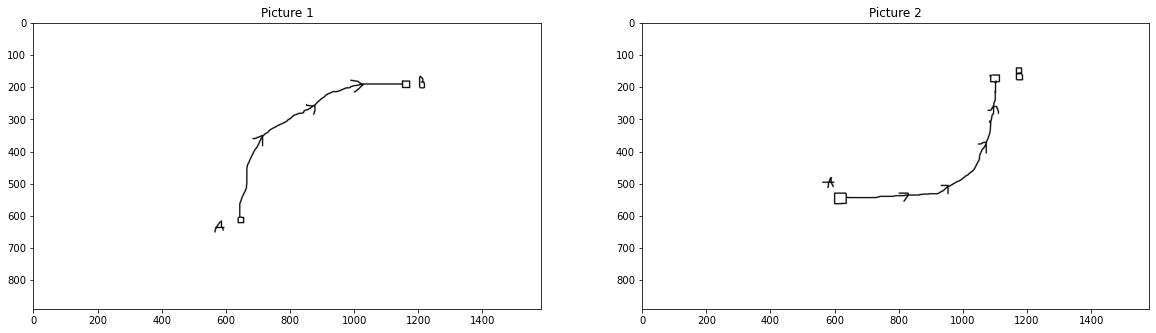

In [28]:
plt.figure(figsize=(20,10))
columns = 2
plt.subplot(1,2,1)
image1 = plt.imread('turn1.png')
plt.imshow(image1)
plt.title('Picture 1')
plt.subplot(1,2,2)
image2 = plt.imread('turn2.png')
plt.imshow(image2)
plt.title('Picture 2')
plt.show()

* In picture 1, we start from an initial direction which is heading toward the north. Then we **contimuously increase the heading degree angle from 0 to 90** until we are heading toward the east. Notice that it will take **some time** until the car completely changes its direction.
* In picture 2, we start from an initial direction which is heading toward the east. Then, we **continuously decrease the heading degree angle from 90 to 0** until we are heading toward the north. It is also talke **some time** until the car completely changes its direction.

**Remark:** *Please keep in mind that, I only consider two typical cases in the above argument due to time constraint. There are other cases where we can define a turn but they are more or less generalized version of the above two cases.* 

Now, let's look at the plot of the column **time_seconds**  against the column **heading_degrees** to confirm our insight about a turn.

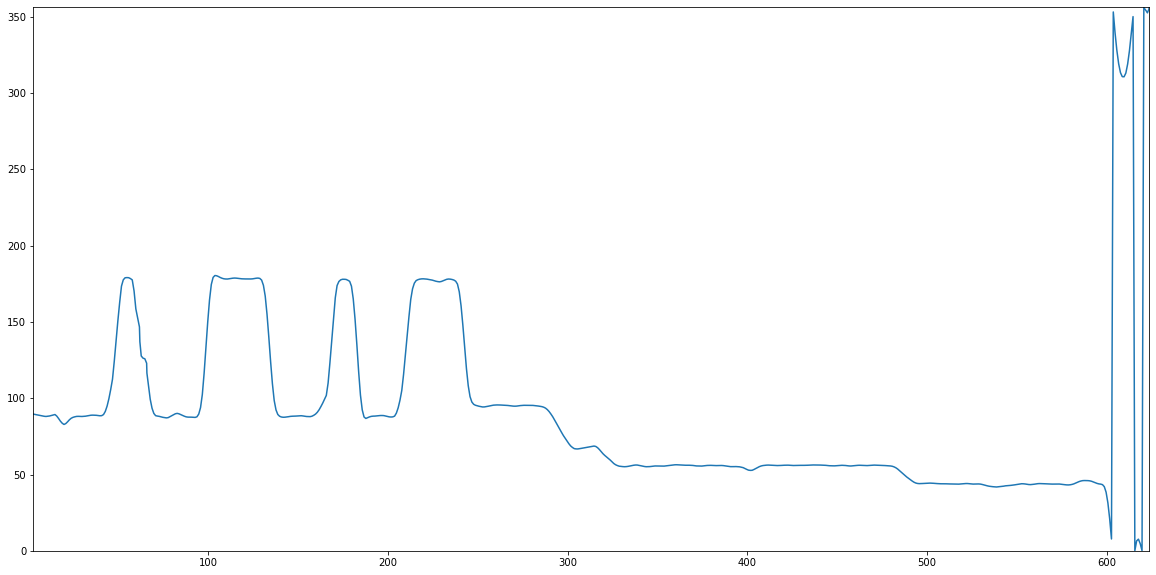

In [29]:
plt.figure(figsize = (20,10))
plt.margins(0.0001)
plt.plot(trip_example['time_seconds'], trip_example['heading_degrees'])
plt.show()

Now, let's focus on what happend in the first 100 seconds.

In [30]:
trip_example

,time_seconds,speed_meters_per_second,heading_degrees
0,0.000,9.170000,NaN
1,0.994,9.311178,NaN
2,1.711,11.184463,NaN
3,2.711,11.820962,89.572280
4,3.711,12.141592,89.334795
...,...,...,...
626,623.463,2.389231,354.789760
627,623.711,2.058260,356.250950
628,624.711,1.883894,NaN
629,625.711,1.628717,NaN


In [31]:
trip_example[(trip_example['time_seconds'] < 80) & (trip_example['time_seconds'] > 70)]

,time_seconds,speed_meters_per_second,heading_degrees
72,70.711,12.085367,88.565655
73,71.711,13.176448,88.300087
74,72.711,14.083164,88.111415
75,73.711,14.724453,87.786565
76,74.711,15.263945,87.492565
77,75.711,15.544003,87.281083
78,76.711,15.688056,87.109947
79,77.711,15.863179,87.285032
80,78.711,16.119379,87.914454
81,79.711,16.170944,88.606022


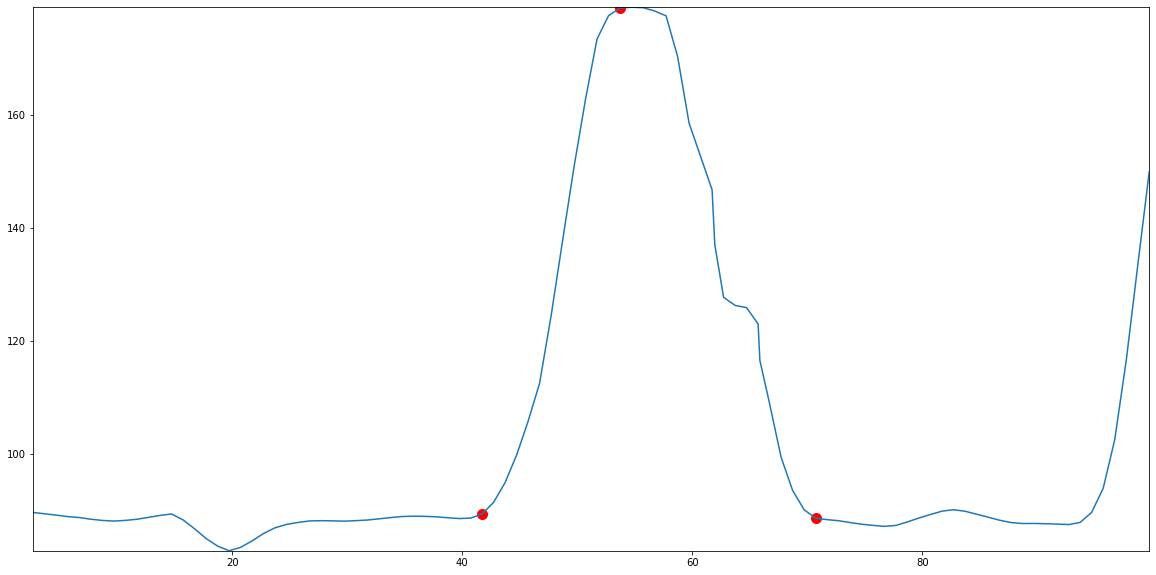

In [32]:
plt.figure(figsize = (20,10))
plt.margins(0.0001)
x = trip_example[trip_example['time_seconds']<100]['time_seconds']
y = trip_example[trip_example['time_seconds']<100]['heading_degrees']
plt.plot(x, y)
u = [41.711, 53.711, 70.711]
v = [89.288882, 178.933138, 88.565655]
plt.scatter( u, v, s = 100, color = 'red', marker = 'o')
plt.show()

We see that from time 0 to the time at the first red dot, the heading degree angle does not change that much. Then, after the time at the first red dot, the heading degree angle increases continuously until the time at the second red dot. In addition, the difference between the angles at these two red dots is bigger than 60 degree. Thus, this case is similar to Picture 1 above which is a left turn.

On the other hand, from the time at the second red dot to the time at the third red dot, the deading degree angle decreases continuously. Moreover, the difference between the angles at these two red dots is bigger than 60 degree. Thus, this case is similar to Piture 2 above which is a right turn.

Looking back at the full picture of the heading degrees above, the same patterns also happen most of the time. Thus we come up with the following formal definition of a turn.

> **Definition:** *A turn is a period of time when the heading degree angle keeps increasing or decreasing such that the absolute difference between the heading degree angles at the starting time and the ending time is larger than 60 degree.*

However, there is still a problem when we apply this definition to our problem. Let's look at the last 100 seconds

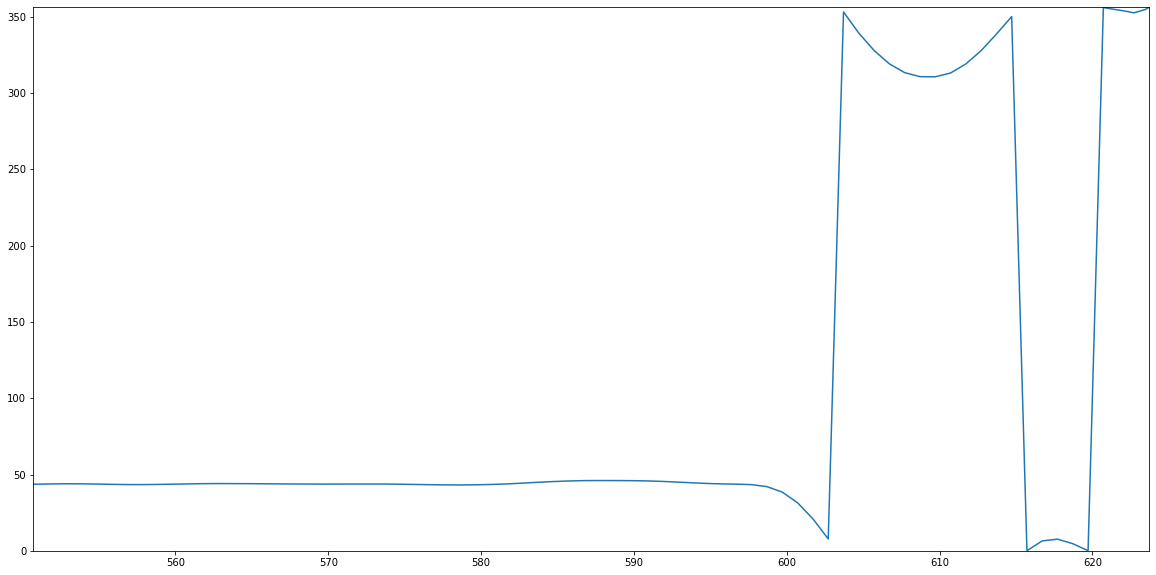

In [33]:
plt.figure(figsize = (20,10))
plt.margins(0.0001)
x = trip_example[trip_example['time_seconds']>550]['time_seconds']
y = trip_example[trip_example['time_seconds']>550]['heading_degrees']
plt.plot(x, y)
plt.show()

At approximately 603 second, the heading degree angle is about 5. However, it suddenly increases to approximately 355. Based on our definition of a turn, we should count this case as a right turn. However, it is almost impossible to take a right turn 360 degree in an instant in reality. Thus, in this situation, the heading angle must decreases from 5 to -5. Since the sensor can only record heading angles between $[0, 360]$, it recorded 355 instead of -5. Thus this case is not a turn. 

Based on the above insight, we have to normalize our heading degree angles before we apply our definition to count the number of turns. Specifically, if a jump from near 0 to near 360 happens, we are going to subtract all the heading degree angles after it until the next jump by 360. On the other hand,  if a jump from near 360 to near 0 happens, we are going to add all the heading degree angles after it until the next jump by 360. Here is the code tha normalize the heading degrees.

In [34]:
def smooth_data(data_in):
    '''
        re define data in the break point (when the car change from 0 to 360 immediately)
    '''
    count_array = [len(data_in)]
    count,i = 0,0 # count number data takes breach
    while i < len(data_in)-1:
        # Change through origin coordinate
        if abs(data_in.iloc[i] - data_in.iloc[i+1]) >= 300:
            if data_in.iloc[i] <= 30: # Change from 0 to 360
                count = count - 1
            if data_in.iloc[i] >= 330:# Change from 360 to 0
                count = count + 1
            count_array.append(count)
        else:
            count_array.append(count)
        i+=1
    convert = np.array(data_in) + (np.array(count_array)*360) # Convert data
    return convert

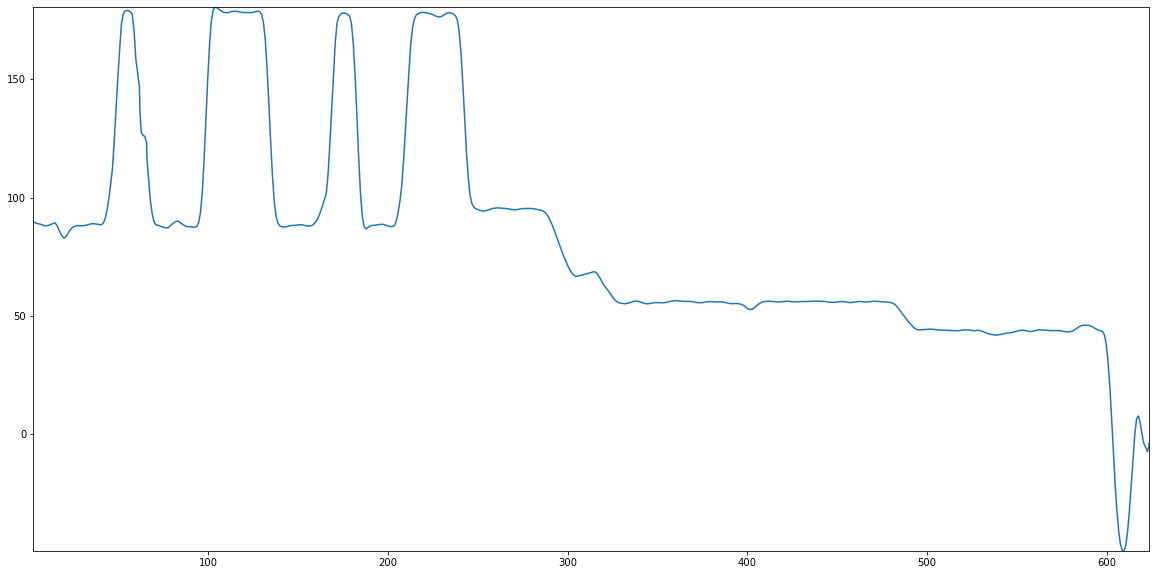

In [35]:
heading_degrees_normalized = smooth_data(trip_example['heading_degrees'])
plt.figure(figsize = (20,10))
plt.margins(0.0001)
plt.plot(trip_example['time_seconds'], heading_degrees_normalized )
plt.show()

Using this new picture, we see that there is only one turn in the last 100 seconds. Let's go back to the first 100 seconds and see how we count the number of turns.

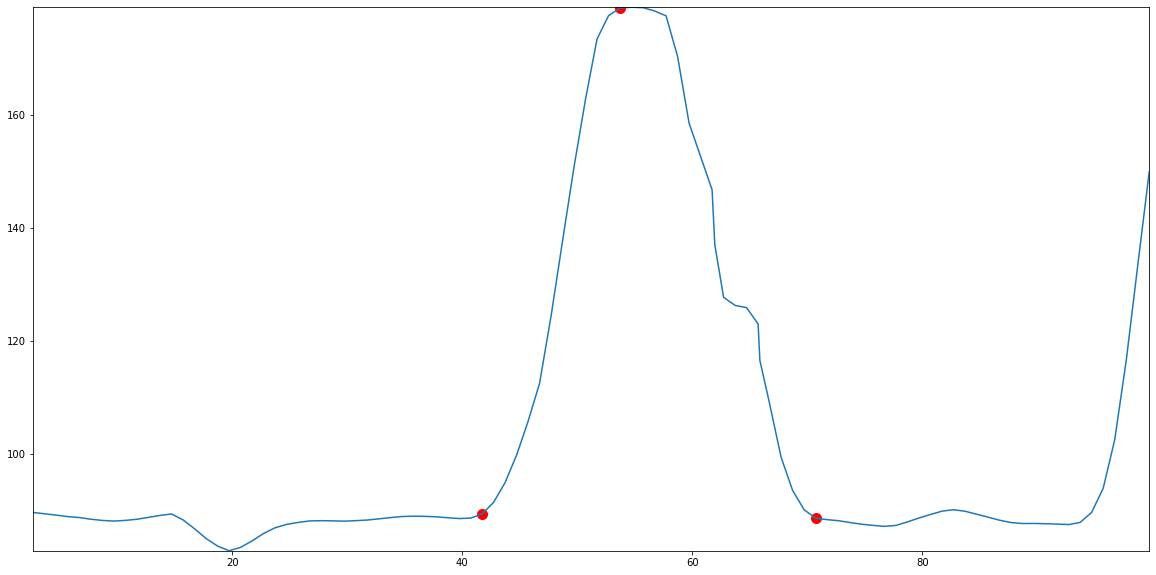

In [36]:
plt.figure(figsize = (20,10))
plt.margins(0.0001)
x = trip_example[trip_example['time_seconds']<100]['time_seconds']
y = trip_example[trip_example['time_seconds']<100]['heading_degrees']
plt.plot(x, y)
u = [41.711, 53.711, 70.711]
v = [89.288882, 178.933138, 88.565655]
plt.scatter( u, v, s = 100, color = 'red', marker = 'o')
plt.show()

The general idea is that:
* First we loop through time to find the fist time a significant change in the heading degree angle happends (the first red dot) and save it in the <code>start_moment</code> variable as the starting time of a period of changing the direction. We do that by checking the condition <code>heading_degrees[i] - heading_degrees[i+time_epsilon]) >= degree_epsilon_start</code>  where <code>degree_epsilon_start</code> is a pre-define short period of time.
* From the <code>start_moment</code>  we are going to check if the heading degree angle continue to change or not by checking the condition <code>abs(heading_degrees[j]-heading_degrees[j+time_epsilon]) >= degree_epsilon_condition</code> where <code>degree_epsilon_condition</code> is another pre-define short period of time. If the heading degree angle stops changing (the second red dot) then we then we save it in the <code> finish_moment</code> variable to mark the ending time of a period of changing the direction.
* If <code>abs(heading_degrees[start_moment] - heading_degrees[finish_moment]) >= 60 </code>, we count one turn.
* We continue the loop in the same fashion.

Here is the function that conunts the number of turns given an array of heading degrees:

In [37]:
def count_change_direction(heading_degrees):
    time_epsilon = 3
    degree_epsilon_start = 5
    degree_epsilon_condition = 2
    #counting number of turns
    i = 0
    count = 0
    #change_moment = []
    while i  < len(trip)-time_epsilon:
        if abs(heading_degrees[i] - heading_degrees[i+time_epsilon]) >= degree_epsilon_start: 
            start_moment = i 
            finish_moment = i+time_epsilon 
            # Find finish changing direction moment. When degree stops changing
            while (finish_moment+time_epsilon < len(trip)) and\
                    (abs(heading_degrees[finish_moment] - \
                    heading_degrees[finish_moment+time_epsilon]) >= \
                    degree_epsilon_condition): 
                finish_moment += time_epsilon
            if abs(heading_degrees[start_moment] - \
                    heading_degrees[finish_moment]) >= 60:
                count += 1
                #change_moment.append(start_moment)
            i = finish_moment
        else:
            i += 1
    return count

Let's use the about function to count the number of turns in all trips.

In [38]:
num_turns_train = {}
path = 'trip_data_train/trip_data'
for file in os.listdir(path):
    p = os.path.join(path, file)
    if file[-3:] == 'csv':
        trip = pd.read_csv(p)
        trip_index = int(file[0:4])    
        heading_degrees = smooth_data(trip["heading_degrees"])
        count = count_change_direction(heading_degrees)
        num_turns_train[trip_index] = count
#sort num_turns based on its keys
list_num_turns_train = list(dict(sorted(num_turns_train.items())).values())        

In [39]:
num_turns_test = {}
path = 'work_sample_test_trips'
for file in os.listdir(path):
    p = os.path.join(path, file)
    if file[-3:] == 'csv':
        trip = pd.read_csv(p)
        trip_index = int(file[0:4])    
        heading_degrees = smooth_data(trip["heading_degrees"])
        count = count_change_direction(heading_degrees)
        num_turns_test[trip_index] = count
#sort num_turns based on its keys
list_num_turns_test = list(dict(sorted(num_turns_test.items())).values())

**Time complexity:** Assume that each .csv file has **n** rows, then the above code takes **O(n)** times to count the number of turns in one <code>.csv</code> file. Thus, if a folder has **m** <code>.csv</code> files, then the code above takes **O(mn)** times to count the number of turns in all <code>.csv</code> files.

**Space complexity:** We only need **O(m)** space to store the results which is unavoidable. 

## **Data preprocessing**
For convenience, we are going to preprocess both train data and test data. In general, it is better to create a pipeline using <code>sklearn.pipeline.make_pipeline</code>. However, in order make things clear, we are going to go through step-by-step. 

**Step 1:** we separate the target **y** from the data, then we add two new features into the data. 

In [40]:
#sample train set
df_train = pd.read_csv('model_data_train.csv')
y = df_train['y'].values
data_train = df_train.drop(['y'], axis = 1)
data_train['num_stops'] = list_num_stops_train
data_train['num_turns'] = list_num_turns_train

#sample test set
data_test = pd.read_csv('model_data_test.csv')
data_test['num_stops'] = list_num_stops_test
data_test['num_turns'] = list_num_turns_test

In [41]:
display(data_train.head())
print("Sample train's shape: {0}".format(data_train.shape))

,filename,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,num_stops,num_turns
0,0000.csv,False,False,True,5.209096,9789.261511,30753.872048,0.001010,5,13,1,9.373984e+03,0.317920,9.379193e+03,4.974085,0,3
1,0001.csv,False,False,False,4.450941,10552.521899,33151.725274,0.001000,3,11,1,4.251619e+04,2.229321,4.252064e+04,3.151531,1,8
2,0002.csv,False,False,True,5.396552,10233.433119,32149.278307,0.001015,6,13,1,1.305321e+07,34.259512,1.305322e+07,6.236594,0,3
3,0003.csv,False,False,True,4.970163,10829.056746,34020.485118,0.000993,4,8,1,1.131908e+03,25.768714,1.136878e+03,3.968008,1,5
4,0004.csv,False,False,False,5.266868,10678.703687,33548.137053,0.001009,6,11,1,3.163256e+03,145.154357,3.168523e+03,5.999782,0,3


Sample train's shape: (1000, 17)


In [42]:
display(data_test.head())
print("Sample test's shape: {0}".format(data_test.shape))

,filename,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,num_stops,num_turns
0,1000.csv,False,False,True,6.002290,11021.870460,34626.227267,0.000986,5,9,1,1.954513e+02,22.269055,2.014536e+02,5.076019,7,9
1,1001.csv,False,False,True,5.886440,11983.807690,37648.242201,0.000997,5,18,1,9.078651e+04,45.626548,9.079240e+04,5.105855,1,5
2,1002.csv,True,False,True,5.465596,8028.071307,25220.929841,0.000985,6,15,1,6.150144e+07,501316.506956,6.150145e+07,5.925519,2,6
3,1003.csv,False,False,True,4.553190,9232.252788,29003.977535,0.001005,7,7,1,2.743655e+00,0.088515,7.296845e+00,6.895799,1,3
4,1004.csv,False,False,True,3.568974,9474.154588,29763.934451,0.000999,5,9,1,7.982789e+04,4.383958,7.983146e+04,5.237802,5,3


Sample test's shape: (876, 17)


In [43]:
y[:10]

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0])

**Step 2:** we drop columns **filename, feature2** and **feature10** from the data.

In [44]:
#sample train set
data_train.drop(['filename', 'feature2', 'feature10'], axis = 1, inplace = True)
#sample test set
data_test.drop(['filename', 'feature2', 'feature10'], axis = 1, inplace = True)

In [45]:
data_train.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature11,feature12,feature13,feature14,num_stops,num_turns
0,False,True,5.209096,9789.261511,30753.872048,0.001010,5,13,9.373984e+03,0.317920,9.379193e+03,4.974085,0,3
1,False,False,4.450941,10552.521899,33151.725274,0.001000,3,11,4.251619e+04,2.229321,4.252064e+04,3.151531,1,8
2,False,True,5.396552,10233.433119,32149.278307,0.001015,6,13,1.305321e+07,34.259512,1.305322e+07,6.236594,0,3
3,False,True,4.970163,10829.056746,34020.485118,0.000993,4,8,1.131908e+03,25.768714,1.136878e+03,3.968008,1,5
4,False,False,5.266868,10678.703687,33548.137053,0.001009,6,11,3.163256e+03,145.154357,3.168523e+03,5.999782,0,3


In [46]:
data_test.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature11,feature12,feature13,feature14,num_stops,num_turns
0,False,True,6.002290,11021.870460,34626.227267,0.000986,5,9,1.954513e+02,22.269055,2.014536e+02,5.076019,7,9
1,False,True,5.886440,11983.807690,37648.242201,0.000997,5,18,9.078651e+04,45.626548,9.079240e+04,5.105855,1,5
2,True,True,5.465596,8028.071307,25220.929841,0.000985,6,15,6.150144e+07,501316.506956,6.150145e+07,5.925519,2,6
3,False,True,4.553190,9232.252788,29003.977535,0.001005,7,7,2.743655e+00,0.088515,7.296845e+00,6.895799,1,3
4,False,True,3.568974,9474.154588,29763.934451,0.000999,5,9,7.982789e+04,4.383958,7.983146e+04,5.237802,5,3


**Step 3:** we apply *log transform* to columns **feature11, feature12, feature13** and rename these columns to **log_feature11, log_feature12, log_feature13**.

In [47]:
#train set
data_train['feature11'] = data_train['feature11'].apply(np.log)
data_train['feature12'] = data_train['feature12'].apply(np.log)
data_train['feature13'] = data_train['feature13'].apply(np.log)
data_train.rename(columns={"feature11": "log_feature11", "feature12": "log_feature12", "feature13": "log_feature13"}, inplace = True)

#test set
data_test['feature11'] = data_test['feature11'].apply(np.log)
data_test['feature12'] = data_test['feature12'].apply(np.log)
data_test['feature13'] = data_test['feature13'].apply(np.log)
data_test.rename(columns={"feature11": "log_feature11", "feature12": "log_feature12", "feature13": "log_feature13"}, inplace = True)

In [48]:
data_train.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,log_feature11,log_feature12,log_feature13,feature14,num_stops,num_turns
0,False,True,5.209096,9789.261511,30753.872048,0.001010,5,13,9.145693,-1.145954,9.146249,4.974085,0,3
1,False,False,4.450941,10552.521899,33151.725274,0.001000,3,11,10.657640,0.801697,10.657745,3.151531,1,8
2,False,True,5.396552,10233.433119,32149.278307,0.001015,6,13,16.384545,3.533964,16.384545,6.236594,0,3
3,False,True,4.970163,10829.056746,34020.485118,0.000993,4,8,7.031660,3.249161,7.036041,3.968008,1,5
4,False,False,5.266868,10678.703687,33548.137053,0.001009,6,11,8.059357,4.977798,8.061021,5.999782,0,3


In [49]:
data_test.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,log_feature11,log_feature12,log_feature13,feature14,num_stops,num_turns
0,False,True,6.002290,11021.870460,34626.227267,0.000986,5,9,5.275311,3.103198,5.305559,5.076019,7,9
1,False,True,5.886440,11983.807690,37648.242201,0.000997,5,18,11.416266,3.820490,11.416331,5.105855,1,5
2,True,True,5.465596,8028.071307,25220.929841,0.000985,6,15,17.934571,13.124993,17.934571,5.925519,2,6
3,False,True,4.553190,9232.252788,29003.977535,0.001005,7,7,1.009291,-2.424584,1.987442,6.895799,1,3
4,False,True,3.568974,9474.154588,29763.934451,0.000999,5,9,11.287628,1.477952,11.287673,5.237802,5,3


**Step 4:** We convert our data to numpy arrays and split sample train set into a train set and a test set. We use 20% data for the test set. We also use <code>stratify</code> parmeter in the <code> train_test_split</code> to make sure that the ratials between class 0 and class 1 in the train set and the test set are the same as in the original sample train set.

In [50]:
from sklearn.model_selection import train_test_split
data_train = data_train.to_numpy(dtype = 'float64')
data_test = data_test.to_numpy(dtype = 'float64')
X_train, X_test, y_train, y_test = train_test_split(data_train, y, test_size=0.2, random_state=42, stratify=y)
print("X_train's shape: {0}".format(X_train.shape))
print("y_train's shape: {0}".format(y_train.shape))
print("X_test's shape: {0}".format(X_test.shape))
print("y_test's shape: {0}".format(y_test.shape))
print("data_test's shape: {0}".format(data_test.shape))

X_train's shape: (800, 14)
y_train's shape: (800,)
X_test's shape: (200, 14)
y_test's shape: (200,)
data_test's shape: (876, 14)


**Step 5:** we seperate numeric features from categorical features.

In [51]:
# train set
X_train_cat = X_train[:,0:2]
X_train_num = X_train[:,2:]
# test set
X_test_cat = X_test[:,0:2]
X_test_num = X_test[:,2:]

**Step 6:** we normalize numeric features.

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_num_std = sc.fit_transform(X_train_num)
#apply the same transformation to X_test_num and data_test_num
X_test_num_std = sc.transform(X_test_num)

**Step 7:** we merge categorical features and numeric features back to one array. 

In [53]:
X_train = np.concatenate((X_train_cat, X_train_num_std), axis = 1)
X_test = np.concatenate((X_test_cat, X_test_num_std), axis = 1)
print("X_train's shape is: {0}".format(X_train.shape))
print("y_train's shape: {0}".format(y_train.shape))
print("X_test's shape is: {0}".format(X_test.shape))
print("y_test's shape: {0}".format(y_test.shape))
print("data_test's shape is: {0}".format(data_test.shape))

X_train's shape is: (800, 14)
y_train's shape: (800,)
X_test's shape is: (200, 14)
y_test's shape: (200,)
data_test's shape is: (876, 14)


## **Evaluation metrics**
**The metric:** Since the data is imbalance, we should not use **accuracy** score as an evaluation metric. Instead, we should use **precision, recall** or **F1-score**. If we know the business, we may want our models focus on **precision** or **recall**. For example, if you do not want to miss any trip that could be an interesting trip, we could create models that have high **recall**. On the other hand, if you are more sellective in interesting trips, you should create models that have high **precision**. In this problem, since we are not clear about the business goals, we will choose the **F1-score** which balances **precision** and **recall**. For more information about **F1-score**, please check https://en.wikipedia.org/wiki/F-score.

**Notice:** Due to time constraint, from now on, we will only focus on **F1-score** and try to build a model that has the highest **F1-score**.

**Baseline models:** Before building our models, let's create two 'dumb' classifiers that we can use as baseline models. The fist classifier only predicts class 0 while the second classifier randomly choose class 0 or class with probability 1/2. 

In [54]:
from sklearn.base import BaseEstimator
from sklearn.metrics import  f1_score

#always predict zero classifier
class ZeroClassifier(BaseEstimator):
    def fit(self, X, y= None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)  

#random prediction
class RandomClassifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.random.randint(2, size=(len(X), 1)).astype(bool) 
    
def f1_stat(scores):
    print('The mean of the f1-score is: {:3.2f}'.format(np.mean(scores)))
    print('The standard deviation of the f1-score is: {:3.2f}'.format(np.std(scores)))        

Since <code>ZeroClassifier</code> only predicts class 0, its **F1-score** is 0. Le's compute the **F1-score** of  <code>RandomClassifier</code> using 10-folds cross validation.

The mean of F1-score is: 0.39
The standard deviation of F1-score is: 0.09


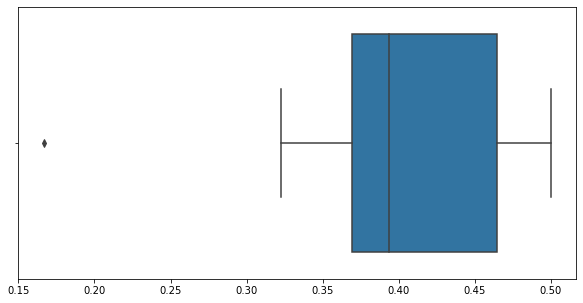

In [55]:
from sklearn.model_selection import cross_validate
rd = RandomClassifier()
cv_rd = cross_validate(rd, X_train, y_train,scoring = 'f1', cv=10,return_train_score = True)
print('The mean of F1-score is: {:3.2f}'.format(np.mean(cv_rd['test_score'])))
print('The standard deviation of F1-score is: {:3.2f}'.format(np.std(cv_rd['test_score'])))
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(cv_rd['test_score'], ax = ax)
plt.show()

## **Models**

In this section, we are going to train and tune three different machine learning models: **Logistic Regression, Random Forest** and **Support Vector Machine**. The main goal of tunning is that we want to find a "sweet" spot of parameters setting that balances the bias-variance trade-off dilemma.

First of all, we are going to write a function that plot the **validation curve** given an estimator, parameter's name and an array parameter's range. Validation curves show the behavior of training scores and validation scores over a parameter's range in the same picture so that we can see if a model is over-fitting or under-fitting. In order to write this function, we need to use <code>validation_curve</code> which can be found at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html.

In [56]:
from sklearn.model_selection import validation_curve
def plot_val_curve1(estimator, param_name, param_range, xscale = None):
    #for each parameter, we use 10-folds cross vaidation to estimate the train_scores and the test_scores. Thus, if we have 5 parameters to try, 
    #then the train_scores and tes_scores are numpy arrays of shape (5, 10)
    train_scores, test_scores = validation_curve(estimator=estimator, X=X_train, y=y_train, param_name=param_name, param_range=param_range, cv=10)
    # we compute mean and standard deviation of train_scores and test_scores for each parameter
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    #we plot both mean and standard deviation of train_scores and test_scores
    plt.plot(param_range, train_mean,color='blue', marker='o', markersize=5, label='train F1-score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation F1-score')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

    plt.grid()
    if xscale == 'log':
        plt.xscale('log')
    plt.legend(loc='lower right')
    plt.xlabel('Parameter {0}'.format(param_name))
    plt.ylabel('F1-score')
    plt.show()

Now, we start to investigate the performance of difference models on our data set. We are going to follow the basic principle in scientific reasearch: do simple cases first, then move to difficult cases. Thus, we start with simple linear classifiers, then move to more complicatied non-linear classifiers.  

### **Logistic regression**

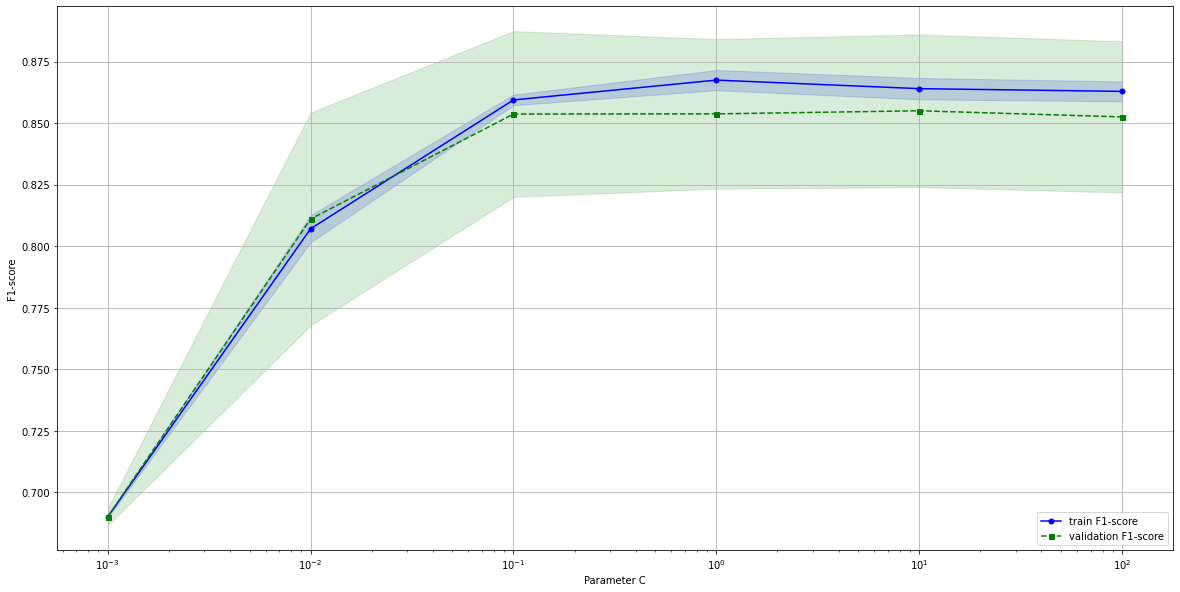

In [57]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression( solver = 'lbfgs',  max_iter=1000)
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
plt.figure(figsize = (20,10))
plot_val_curve1(lr, 'C', param_range,'log')

In [58]:
lr_best = LogisticRegression( solver = 'lbfgs', C = 0.1)
lr_best.fit(X_train, y_train)
y_pred = lr_best.predict(X_test)
f1_score(y_test,y_pred)

0.7894736842105263

**Remark:** we see that logistic regression under-fit the data because the train F1-score and the test F1-score are very closed and far below 1. The best result is approximatelly at $C=0.1$ where the F1-score on  <code>X_test</code> equals to 0.789. Comparing to <code>ZeroClassifier</code> and <code>RandomClassifier</code>, this result is aldready quite good

### **Suport vector machine with linear kernel**

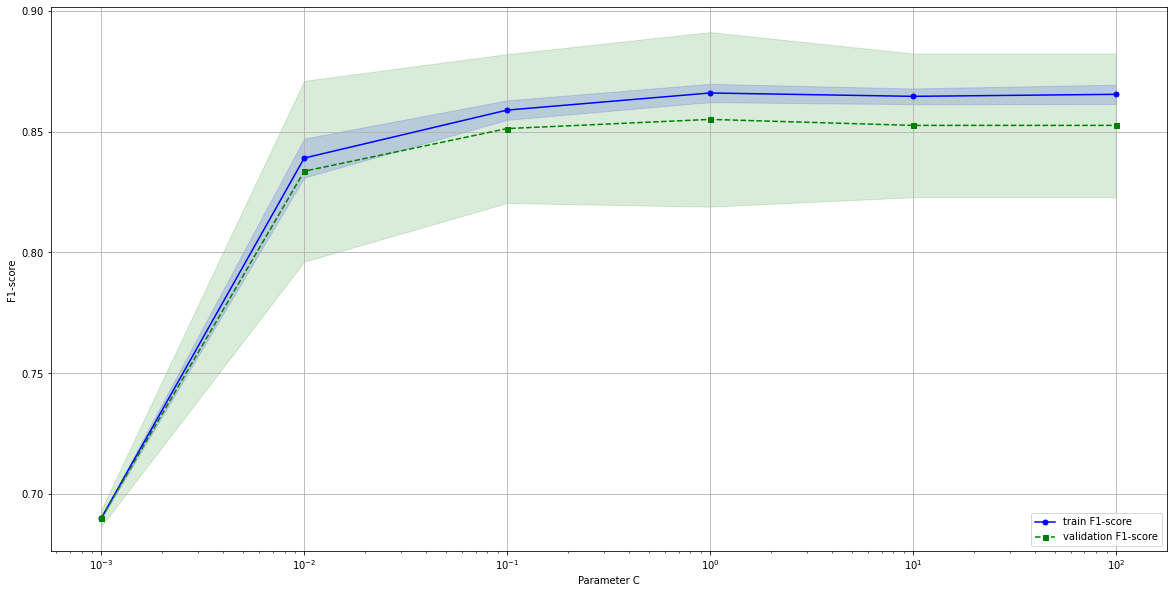

In [59]:
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear')
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
plt.figure(figsize = (20,10))
plot_val_curve1(svm_linear, 'C', param_range, 'log')

In [60]:
#the best parameter C is about 1
svm_linear_best = SVC(kernel = 'linear', C = 1)
svm_linear_best.fit(X_train, y_train)
y_pred = svm_linear_best.predict(X_test)
f1_score(y_test,y_pred)

0.7899159663865545

**Remark:** we see that the validaton curve of support vector machine with linear kernel is very similar to that of logistic regression. It also under-fit the data. The best result is approximatelly at $C=1$ where the F1-score on <code>X_test</code> is equal to 0.79.

>**Conclusion 2:** Since logistic regression and linear support vector machine  under-fit the data and have very similar validation curves, it means that the data is not linear separable. Thus we should try non-linear classifiers that can capture non-linear complex decision surfaces. 

### **Suport vector machine with rbf kernel**
First, we modify our <code>plot_val_curve1</code> function so that we can plot multiple pictures in one plot. 

In [61]:
def plot_val_curve2(estimator, param_name, param_range,i ,xscale = None):
    train_scores, test_scores = validation_curve(estimator=estimator, X=X_train, y=y_train, param_name=param_name, param_range=param_range, cv=10)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    ax[i].plot(param_range, train_mean,color='blue', marker='o', markersize=5, label='train F1-score')
    ax[i].fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    ax[i].plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation F1-score')
    ax[i].fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

    ax[i].grid()
    if xscale == 'log':
        ax[i].set_xscale('log')
    ax[i].legend(loc='lower right')
    ax[i].set_xlabel('Parameter {0}'.format(param_name))
    ax[i].set_ylabel('F1-score')

For support vector machine with rbf kernel, we are going to tune **gamma** and **C**.

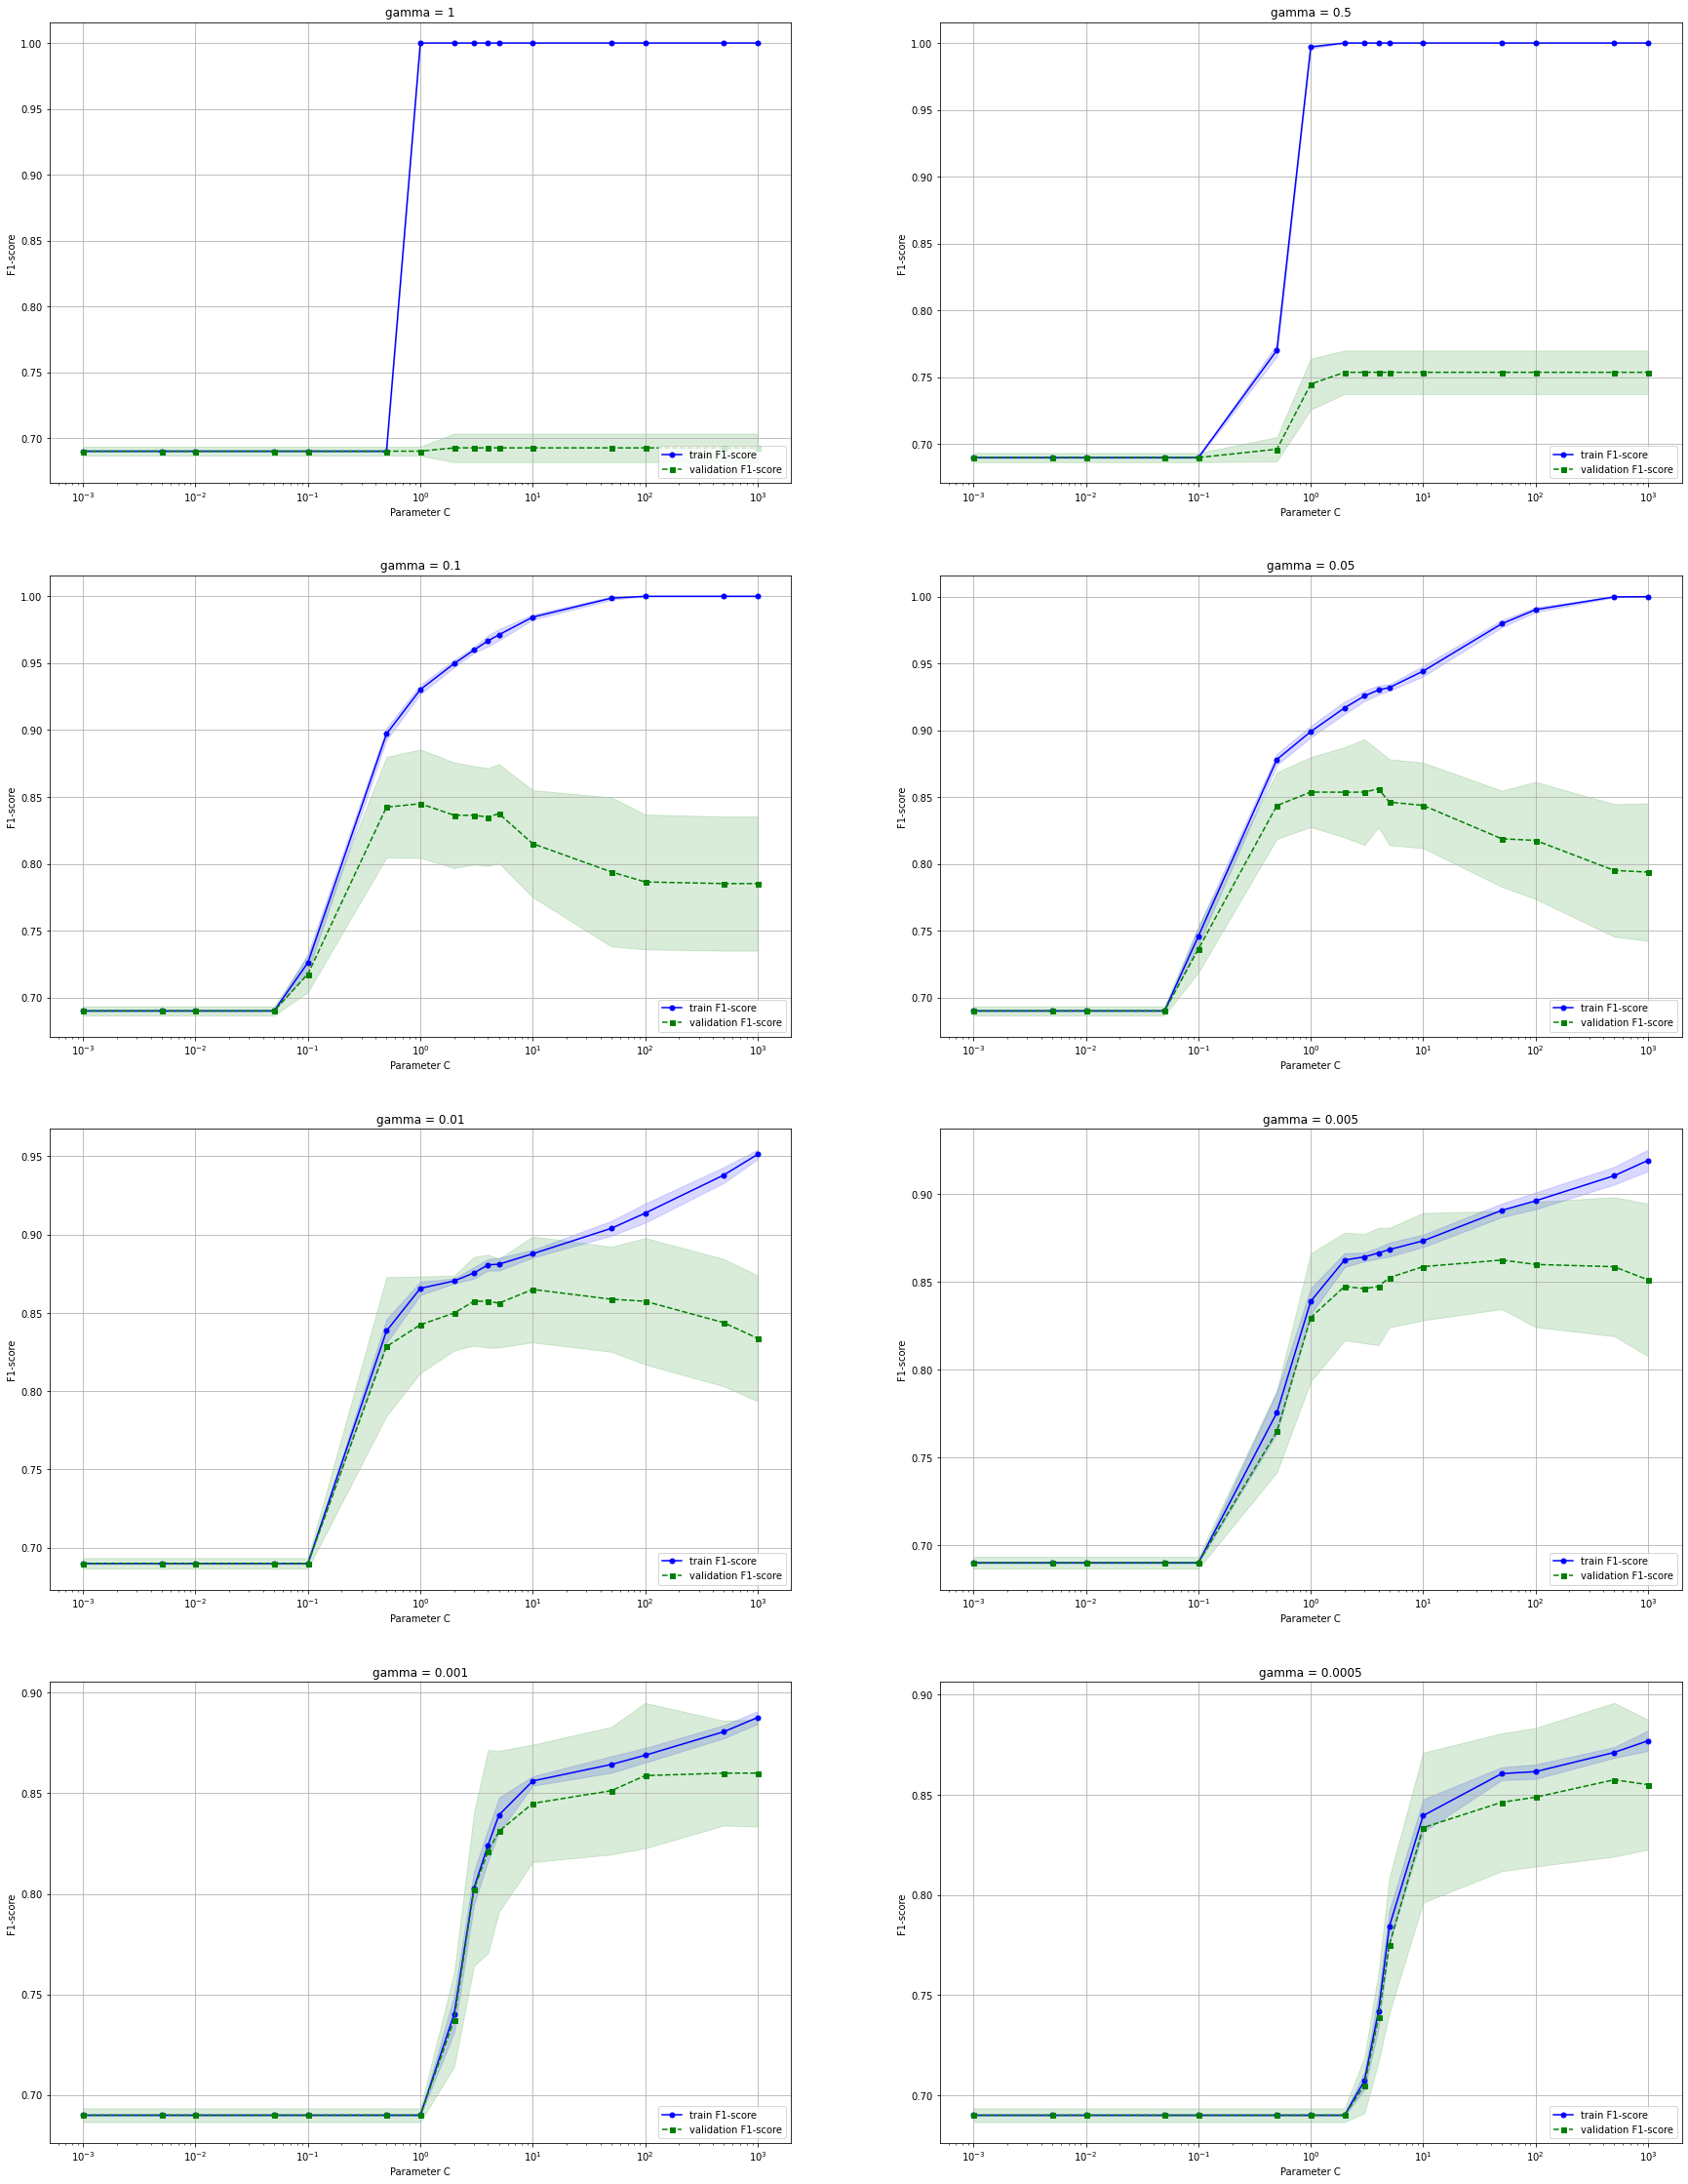

In [62]:
gamma_range = [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005]
param_range = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 3.0, 4.0,5.0, 10.0, 50.0, 100.0, 500.0, 1000.0]
G = len(gamma_range)
fig, ax = plt.subplots(nrows = G//2, ncols = 2, figsize = (30,40))
ax = ax.ravel()
for i in range(G//2):
    svm_rbf = SVC(gamma = gamma_range[2*i])
    plot_val_curve2(svm_rbf, 'C', param_range, 2*i, 'log')
    ax[2*i].set_title('gamma = {0}'.format(gamma_range[2*i]))
    
    svm_rbf = SVC(gamma = gamma_range[2*i+1])
    plot_val_curve2(svm_rbf, 'C', param_range,2*i+1, 'log')
    ax[2*i+1].set_title('gamma = {0}'.format(gamma_range[2*i+1]))

In [63]:
svm_rbf_best = SVC(gamma = 0.001, C = 100)
svm_rbf_best.fit(X_train, y_train)
y_pred = svm_rbf_best.predict(X_test)
f1_score(y_test,y_pred)

0.8034188034188033

**Remark:** we see that when gamma is near to 1, the model over-fit the data badly. For example, when gamma is 1, the train F1-score is 1 but the validation F1-score is below 0.7. When the value of gamma is reduced, the overfitting is als reduced. Based on the picture, it seems that the best result is achieved at gamma = 0.001 and C = 100 where the F1-score on <code>X_test</code> is approcimatelly 0.803.

### **Random forest**
For random forest, we are going to tune **n_estimators** and **max_depth**.

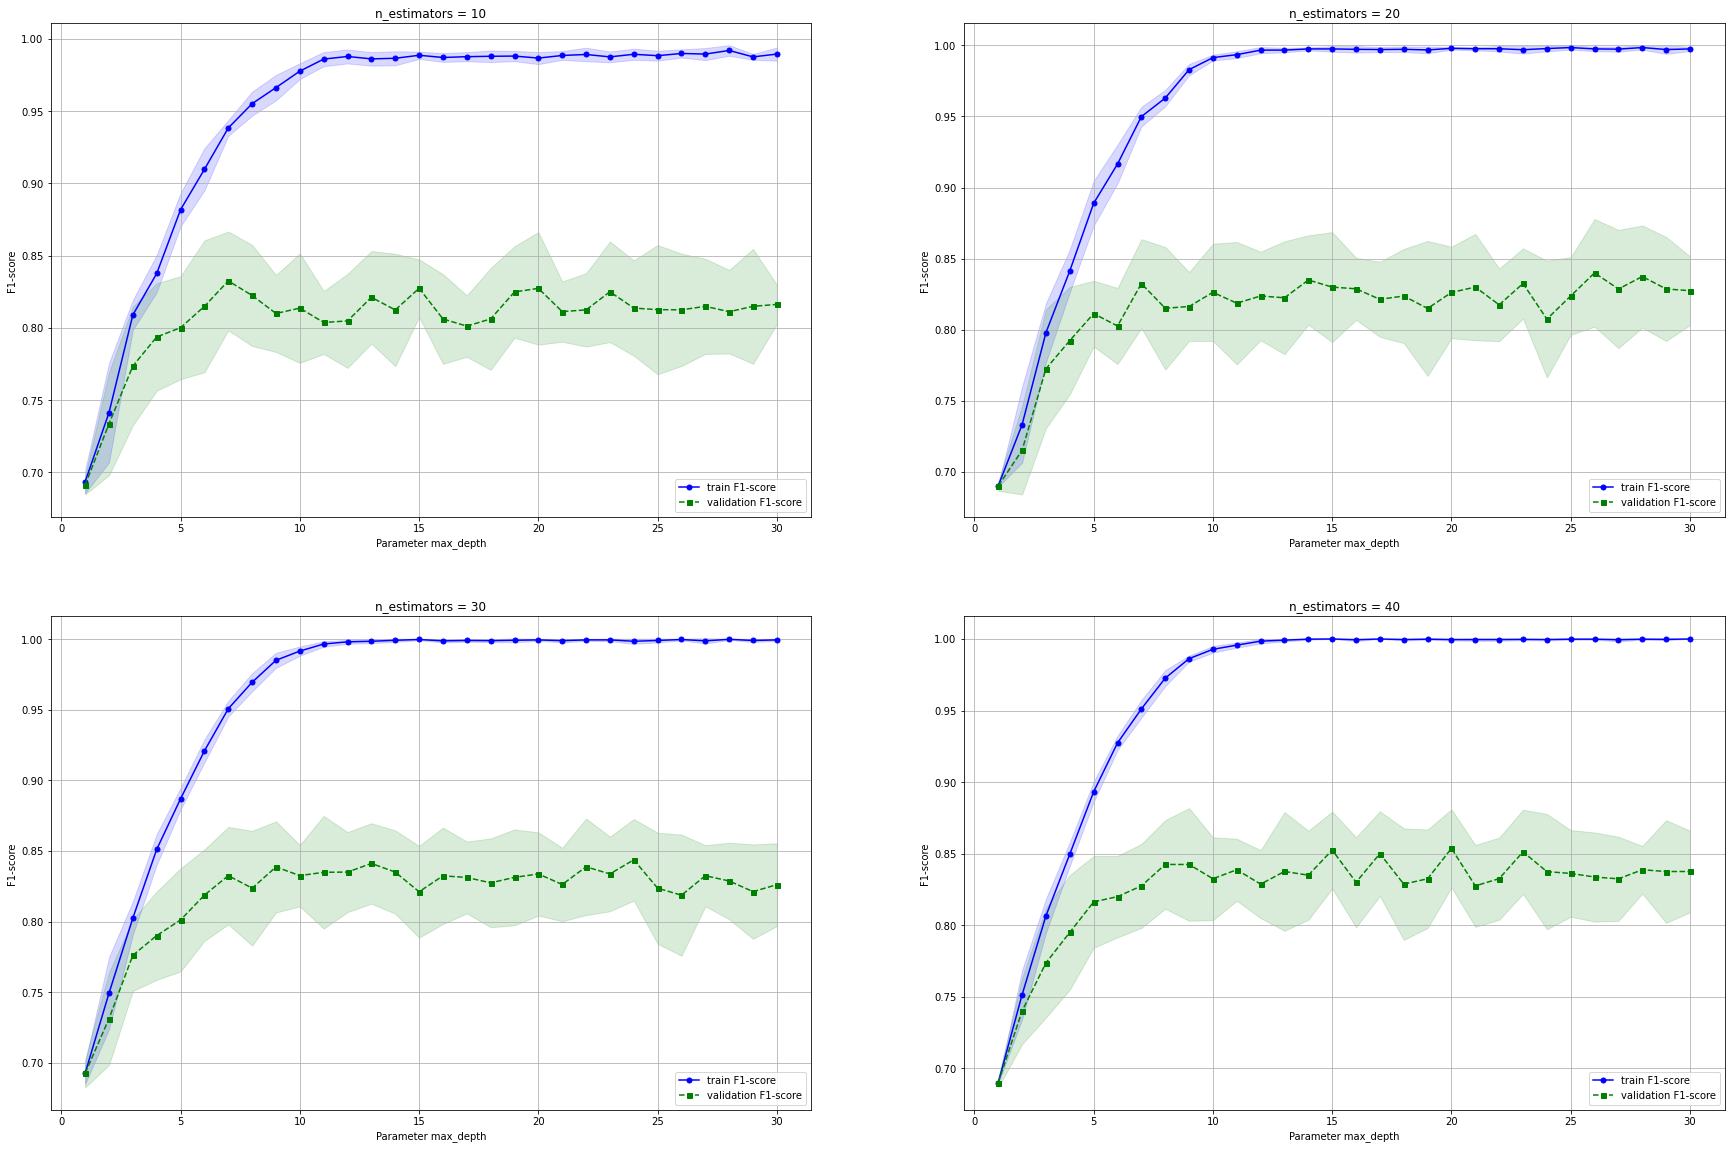

In [64]:
from sklearn.ensemble import RandomForestClassifier
n_estimators_range = [10, 20, 30, 40]
param_range = np.linspace(1, 30, 30, endpoint=True)

E = len(n_estimators_range)
fig, ax = plt.subplots(nrows = E//2, ncols = 2, figsize = (30,20))
ax = ax.ravel()
for i in range(E//2):
    rf = RandomForestClassifier(n_estimators = n_estimators_range[2*i])
    plot_val_curve2(rf, 'max_depth', param_range,2*i)
    ax[2*i].set_title('n_estimators = {0}'.format(n_estimators_range[2*i]))
    
    rf = RandomForestClassifier(n_estimators = n_estimators_range[2*i+1])
    plot_val_curve2(rf, 'max_depth', param_range, 2*i+1)
    ax[2*i+1].set_title('n_estimators = {0}'.format(n_estimators_range[2*i+1]))

**Remark:** random forest over-fits the data very badly when even when we only use n_estimators = 10. The validation curves are always below 0.85 which is worse than the validation curves of logistic regression and support vector machine. Thus random forest may not be a suitable classifier for this problem.

### **Choosing the best model, re-train on full data and generate prediction on test set**
Since  **rbf kernel support vector machine** with **gamma** = 0.001 and **C** = 100 gives the highest F1-score on <code>X_test</code> (0.803), we are going to choose it as the final classifier. We will re-train this classifier on the full <code>data_train</code> set and then use it to predict the <code>data_test</code>.

In [65]:
data_train_cat = data_train[:,0:2]
data_train_num = data_train[:,2:]
data_test_cat = data_test[:,0:2]
data_test_num = data_test[:,2:]

scaler = StandardScaler()
data_train_num_std = scaler.fit_transform(data_train_num)
data_test_num_std = scaler.transform(data_test_num)
X = np.concatenate((data_train_cat, data_train_num_std), axis = 1)
Z = np.concatenate((data_test_cat, data_test_num_std), axis = 1)

In [66]:
clf = SVC(gamma = 0.001, C = 100)
clf.fit(X, y)
y_pred = clf.predict(Z)

In [67]:
indices = list(range(1000,1876))
filenames = [str(x) + '.csv' for x in indices]
data = {'filename': filenames, 'prediction':y_pred}
test_results = pd.DataFrame(data)
test_results.to_csv('test_results.csv', index=False)